In [1]:
%matplotlib inline

In [2]:
!pip install geopandas
!pip install contextily
!pip install missingno
!pip install cuml

  Using cached cuml-0.6.1.post1.tar.gz (1.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for cuml
Failed to build cuml


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [47 lines of output]
  running bdist_wheel
  running build
  C:\Users\default.DESKTOP-SQ5PJUF\anaconda3\Lib\site-packages\setuptools\_distutils\cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
  !!
  
          ********************************************************************************
          Please avoid running ``setup.py`` directly.
          Instead, use pypa/build, pypa/installer or other
          standards-based tools.
  
          See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
          ********************************************************************************
  
  !!
    self.initialize_options()
  installing to build\bdist.win-amd64\wheel
  running install
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>

In [3]:
import pandas as pd
import geopandas as gpd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx

from shapely.geometry import Point
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [169]:
Crashes = pd.read_csv('./Traffic Crashes Crashes.csv')

<Axes: >

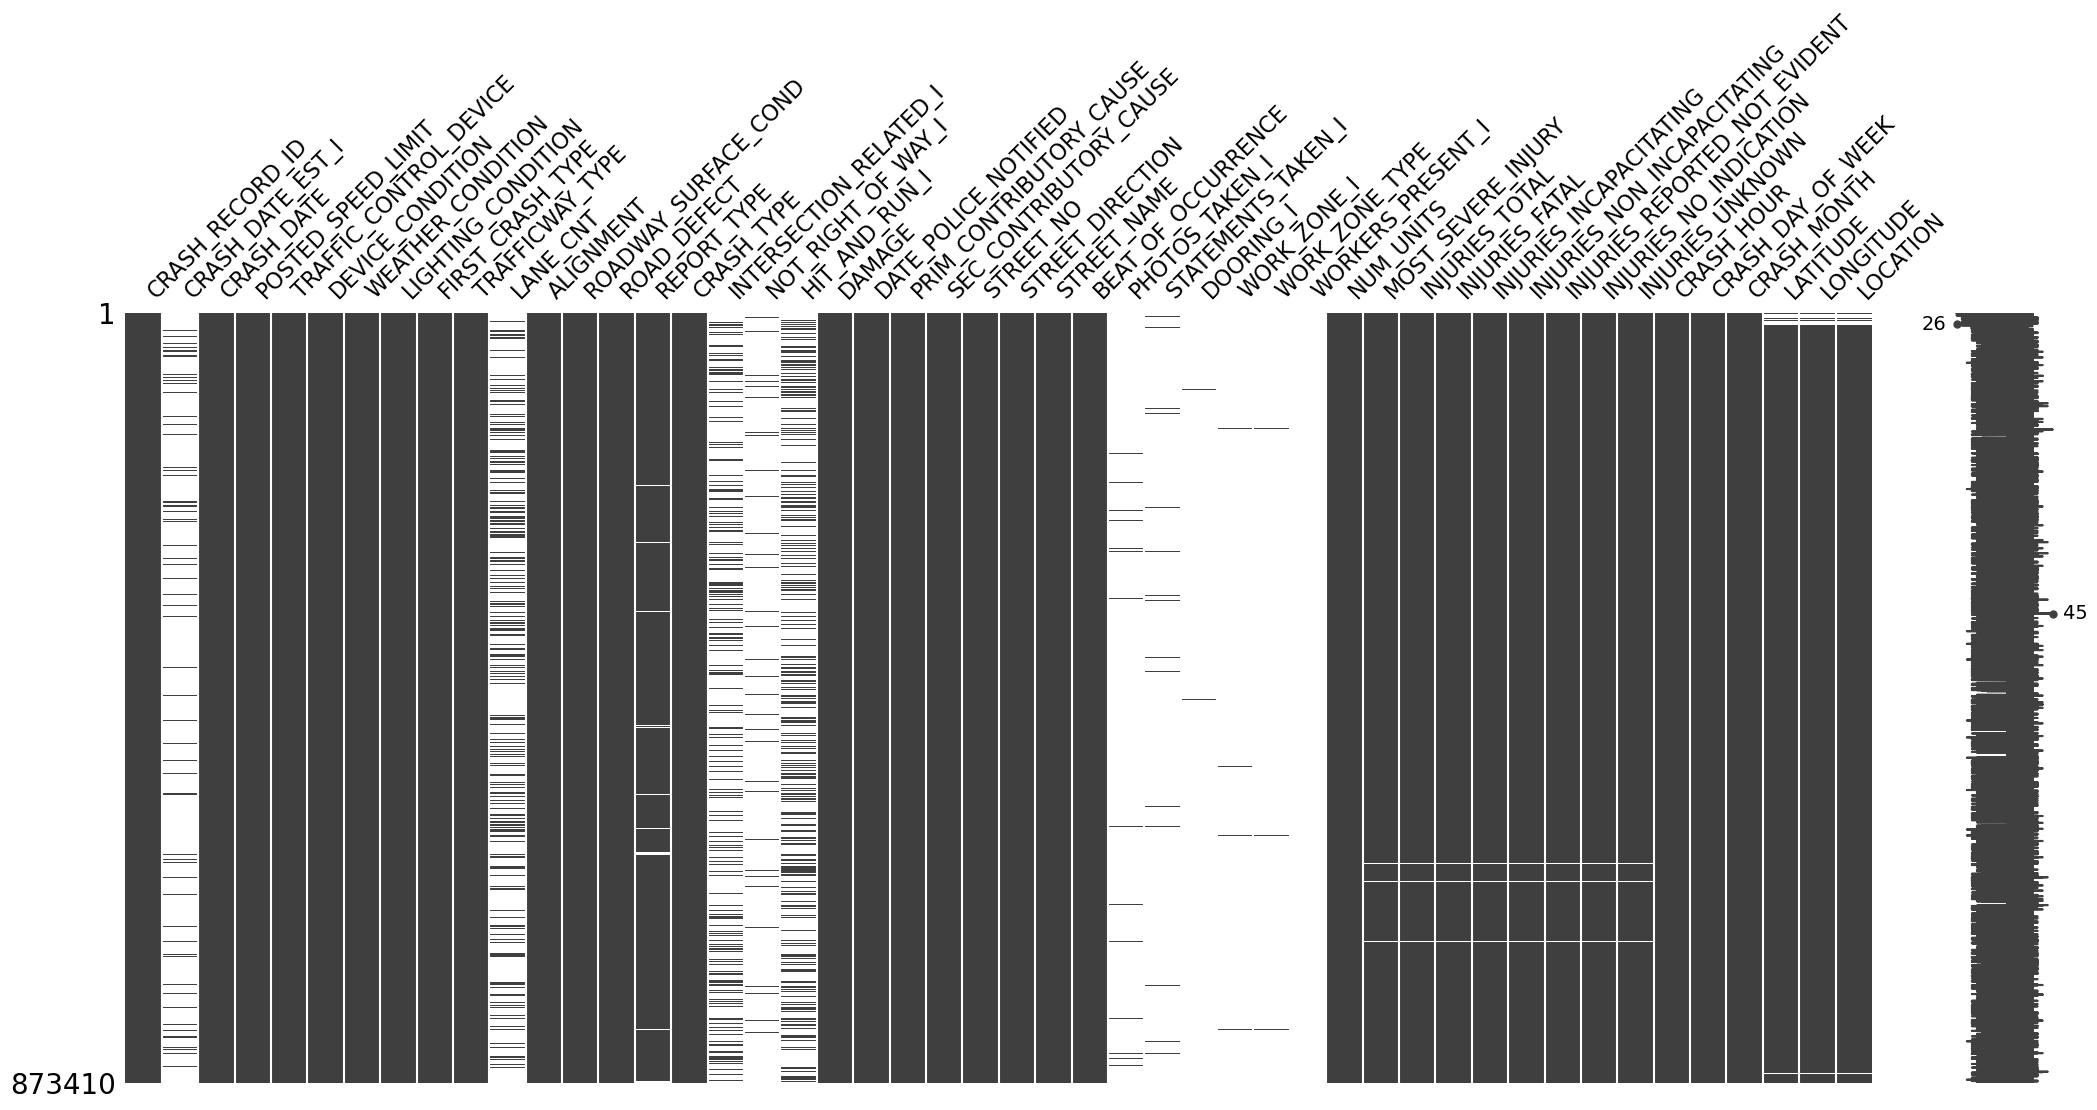

In [5]:

msno.matrix(Crashes)

In [6]:
Crashes.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 808592
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         674395
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       26727
CRASH_TYPE                            0
INTERSECTION_RELATED_I           673086
NOT_RIGHT_OF_WAY_I               833461
HIT_AND_RUN_I                    599600
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [7]:
Crashes = Crashes.drop(
    columns = [
        'PHOTOS_TAKEN_I', 
        'STATEMENTS_TAKEN_I', 
        'DOORING_I', 
        'WORK_ZONE_I', 
        'WORK_ZONE_TYPE', 
        'WORKERS_PRESENT_I'])

In [8]:
Crashes.dtypes

CRASH_RECORD_ID                   object
CRASH_DATE_EST_I                  object
CRASH_DATE                        object
POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE            object
DEVICE_CONDITION                  object
WEATHER_CONDITION                 object
LIGHTING_CONDITION                object
FIRST_CRASH_TYPE                  object
TRAFFICWAY_TYPE                   object
LANE_CNT                         float64
ALIGNMENT                         object
ROADWAY_SURFACE_COND              object
ROAD_DEFECT                       object
REPORT_TYPE                       object
CRASH_TYPE                        object
INTERSECTION_RELATED_I            object
NOT_RIGHT_OF_WAY_I                object
HIT_AND_RUN_I                     object
DAMAGE                            object
DATE_POLICE_NOTIFIED              object
PRIM_CONTRIBUTORY_CAUSE           object
SEC_CONTRIBUTORY_CAUSE            object
STREET_NO                          int64
STREET_DIRECTION

In [9]:
Crashes['CRASH_DATE_EST_I'] = Crashes['CRASH_DATE_EST_I'].fillna('UNKNOWN')
Crashes['CRASH_DATE_EST_I'].astype('category')

0         UNKNOWN
1         UNKNOWN
2         UNKNOWN
3         UNKNOWN
4         UNKNOWN
           ...   
873405    UNKNOWN
873406    UNKNOWN
873407    UNKNOWN
873408          Y
873409    UNKNOWN
Name: CRASH_DATE_EST_I, Length: 873410, dtype: category
Categories (3, object): ['N', 'UNKNOWN', 'Y']

In [10]:
Crashes['CRASH_DATE'] = pd.to_datetime(Crashes['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

In [11]:
Crashes['TRAFFIC_CONTROL_DEVICE'] = Crashes['TRAFFIC_CONTROL_DEVICE'].astype('category')

Crashes['DEVICE_CONDITION'] = Crashes['DEVICE_CONDITION'].astype('category')

Crashes['WEATHER_CONDITION'] = Crashes['WEATHER_CONDITION'].astype('category')

Crashes['LIGHTING_CONDITION'] = Crashes['LIGHTING_CONDITION'].astype('category')

Crashes['FIRST_CRASH_TYPE'] = Crashes['FIRST_CRASH_TYPE'].astype('category')

Crashes['TRAFFICWAY_TYPE'] = Crashes['TRAFFICWAY_TYPE'].astype('category')

Crashes['ALIGNMENT'] = Crashes['ALIGNMENT'].astype('category')

Crashes['ROADWAY_SURFACE_COND'] = Crashes['ROADWAY_SURFACE_COND'].astype('category')

Crashes['ROAD_DEFECT'] = Crashes['ROAD_DEFECT'].astype('category')

Crashes['CRASH_TYPE'] = Crashes['CRASH_TYPE'].astype('category')

Crashes['DAMAGE'] = Crashes['DAMAGE'].astype('category')

Crashes['PRIM_CONTRIBUTORY_CAUSE'] = Crashes['PRIM_CONTRIBUTORY_CAUSE'].astype('category')

Crashes['SEC_CONTRIBUTORY_CAUSE'] = Crashes['SEC_CONTRIBUTORY_CAUSE'].astype('category')

In [12]:
Crashes['REPORT_TYPE'] = Crashes['REPORT_TYPE'].fillna('UNKNOWN')
Crashes['REPORT_TYPE'] = Crashes['REPORT_TYPE'].astype('category')

In [13]:
Crashes['INTERSECTION_RELATED_I'] = Crashes['INTERSECTION_RELATED_I'].fillna('UNKNOWN')
Crashes['INTERSECTION_RELATED_I'] = Crashes['INTERSECTION_RELATED_I'].astype('category')

In [14]:
Crashes['NOT_RIGHT_OF_WAY_I'] = Crashes['NOT_RIGHT_OF_WAY_I'].fillna('UNKNOWN')
Crashes['NOT_RIGHT_OF_WAY_I'] = Crashes['NOT_RIGHT_OF_WAY_I'].astype('category')

In [15]:
Crashes['HIT_AND_RUN_I'] = Crashes['HIT_AND_RUN_I'].fillna('UNKNOWN')
Crashes['HIT_AND_RUN_I'] = Crashes['HIT_AND_RUN_I'].astype('category')

In [16]:
Crashes['DATE_POLICE_NOTIFIED'] = pd.to_datetime(Crashes['DATE_POLICE_NOTIFIED'], format='%m/%d/%Y %I:%M:%S %p')

In [17]:
Crashes['STREET_DIRECTION'] = Crashes['STREET_DIRECTION'].fillna('UNKNOWN')
Crashes['STREET_DIRECTION'] = Crashes['STREET_DIRECTION'].astype('category')

In [18]:
Crashes['STREET_NAME'] = Crashes['STREET_NAME'].fillna('UNKNOWN')
Crashes['STREET_NAME'] = Crashes['STREET_NAME'].astype('category')

In [19]:
Crashes['BEAT_OF_OCCURRENCE'] = Crashes['BEAT_OF_OCCURRENCE'].fillna(0)
Crashes['BEAT_OF_OCCURRENCE'] = Crashes['BEAT_OF_OCCURRENCE'].astype('int')

In [20]:
Crashes['MOST_SEVERE_INJURY'] = Crashes['MOST_SEVERE_INJURY'].fillna('UNKNOWN')
Crashes['MOST_SEVERE_INJURY'] = Crashes['MOST_SEVERE_INJURY'].astype('category')

In [21]:
Crashes = Crashes.dropna(subset=['INJURIES_INCAPACITATING'])
Crashes['INJURIES_INCAPACITATING'] = Crashes['INJURIES_INCAPACITATING'].astype('int')

In [22]:
Crashes = Crashes.dropna(subset=['INJURIES_NON_INCAPACITATING'])
Crashes['INJURIES_NON_INCAPACITATING'] = Crashes['INJURIES_NON_INCAPACITATING'].astype('int')

In [23]:
Crashes = Crashes.dropna(subset=['INJURIES_REPORTED_NOT_EVIDENT'])
Crashes['INJURIES_REPORTED_NOT_EVIDENT'] = Crashes['INJURIES_REPORTED_NOT_EVIDENT'].astype('int')

In [24]:
Crashes = Crashes.dropna(subset=['INJURIES_NO_INDICATION'])
Crashes['INJURIES_NO_INDICATION'] = Crashes['INJURIES_NO_INDICATION'].astype('int')

In [25]:
Crashes = Crashes.dropna(subset=['INJURIES_UNKNOWN'])
Crashes['INJURIES_UNKNOWN'] = Crashes['INJURIES_UNKNOWN'].astype('int')

In [26]:
Crashes = Crashes.dropna(subset=['LATITUDE', 'LONGITUDE', 'LOCATION'])

In [27]:
Crashes['LANE_CNT'].isna().sum()

667545

In [28]:
Crashes['LANE_CNT'].describe()

count    1.977630e+05
mean     1.339611e+01
std      2.970916e+03
min      0.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      1.191625e+06
Name: LANE_CNT, dtype: float64

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
new_column = imputer.fit_transform(Crashes[['LANE_CNT']])
Crashes['LANE_CNT'] = new_column

In [30]:
Crashes = Crashes[Crashes['LANE_CNT'] <= 16.0]

In [31]:
Crashes['LANE_CNT'] = Crashes['LANE_CNT'].astype('int')

In [32]:
Crashes.to_csv('./crashes_cleaned.csv')

## EDA

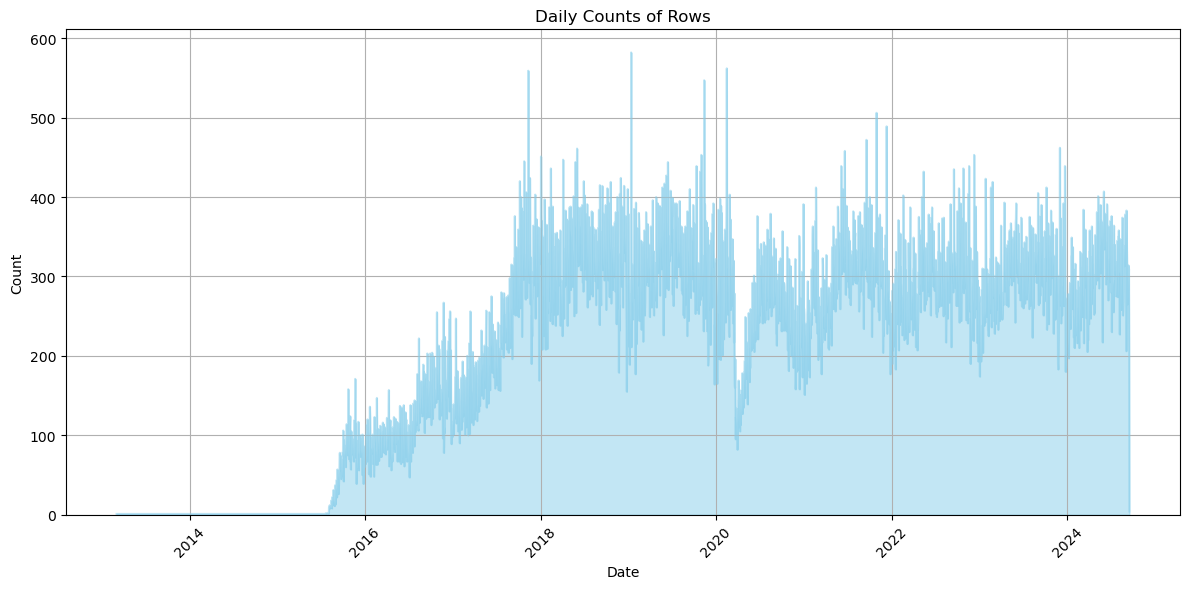

In [33]:
Crashes['date'] = Crashes['CRASH_DATE'].dt.date
daily_counts = Crashes.groupby('date').size()

plt.figure(figsize=(12, 6))
daily_counts.plot(kind='area', alpha=0.5, color='skyblue')
plt.title('Daily Crashes')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

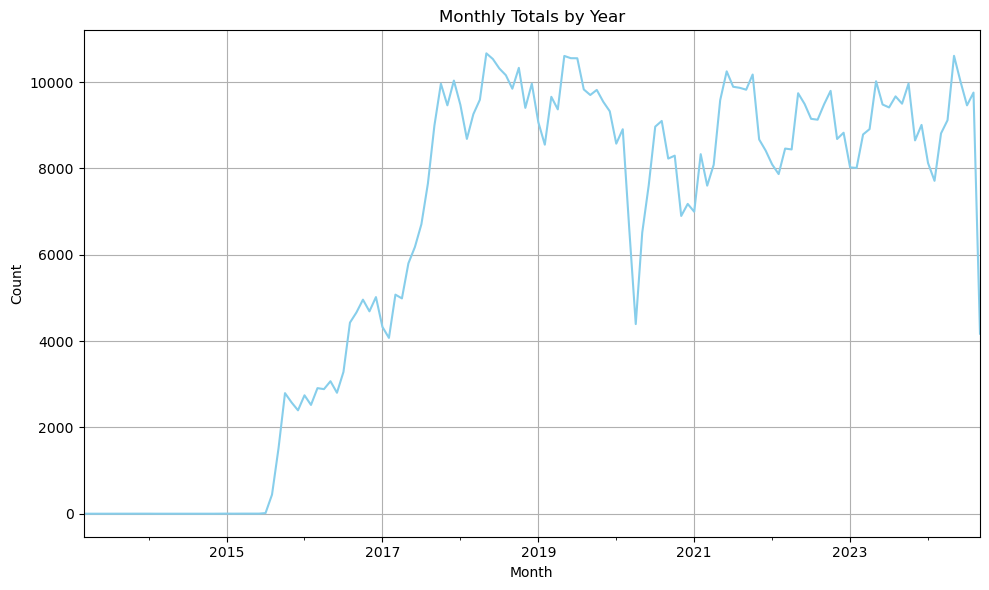

In [34]:
Crashes['year_month'] = Crashes['CRASH_DATE'].dt.to_period('M')
monthly_counts = Crashes.groupby('year_month').size()

plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='line', alpha=1, color='skyblue')
plt.title('Monthly Totals by Year')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid()
plt.tight_layout()
plt.show()

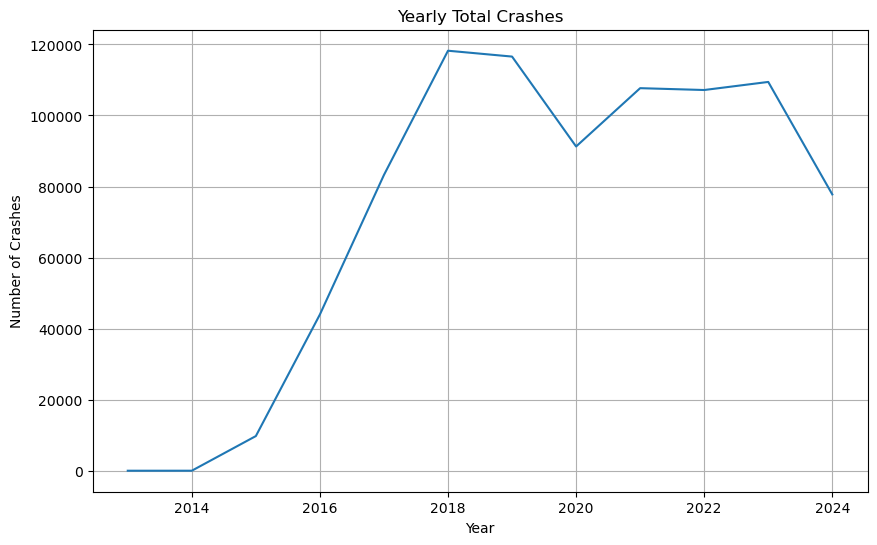

<Figure size 1200x600 with 0 Axes>

In [35]:
Crashes['date_only'] = Crashes['CRASH_DATE'].dt.year
yearly_counts = Crashes.groupby('date_only').size()

yearly_counts.plot(kind='line', figsize=(10, 6), title='Yearly Total Crashes')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.figure(figsize=(12,6))
plt.show()

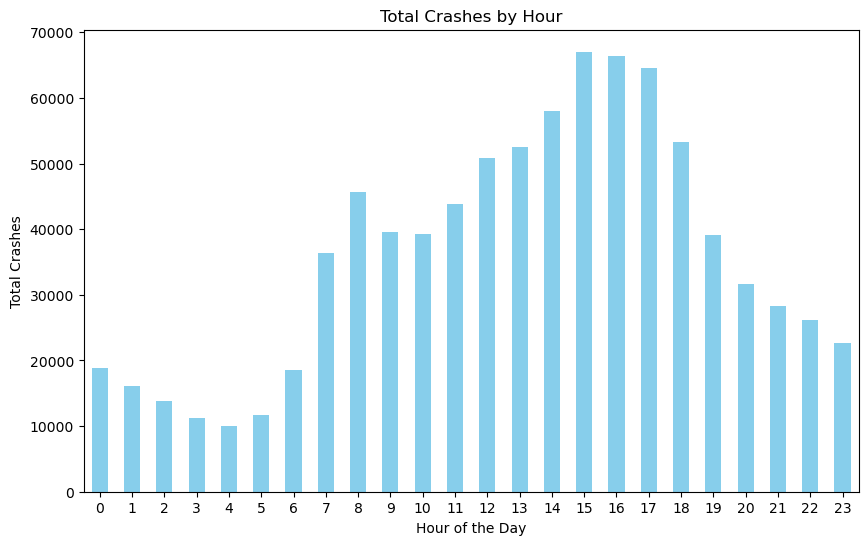

In [36]:
hourly_counts = Crashes.groupby(Crashes['CRASH_DATE'].dt.hour).size()

plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Hour of the Day')
plt.ylabel('Total Crashes')
plt.title('Total Crashes by Hour')
plt.xticks(rotation=0)

plt.show()

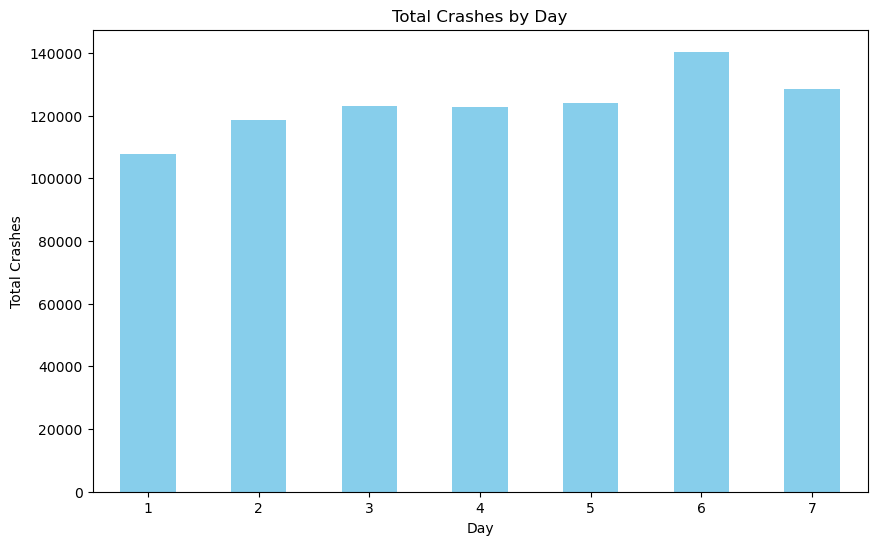

In [37]:
daily_counts = Crashes.groupby(Crashes['CRASH_DAY_OF_WEEK']).size()

plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Day')
plt.ylabel('Total Crashes')
plt.title('Total Crashes by Day')
plt.xticks(rotation=0)


plt.show()

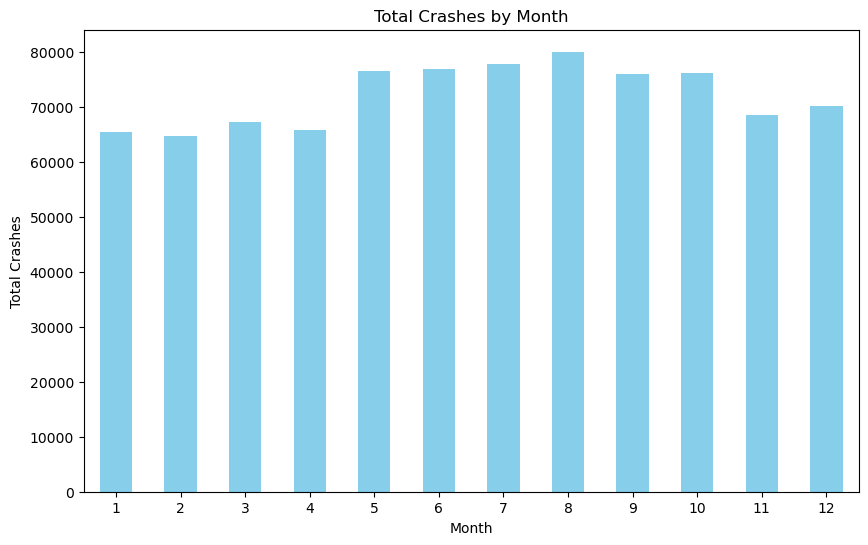

In [38]:
monthly_counts = Crashes.groupby(Crashes['CRASH_MONTH']).size()

plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Month')
plt.ylabel('Total Crashes')
plt.title('Total Crashes by Month')
plt.xticks(rotation=0)

plt.show()

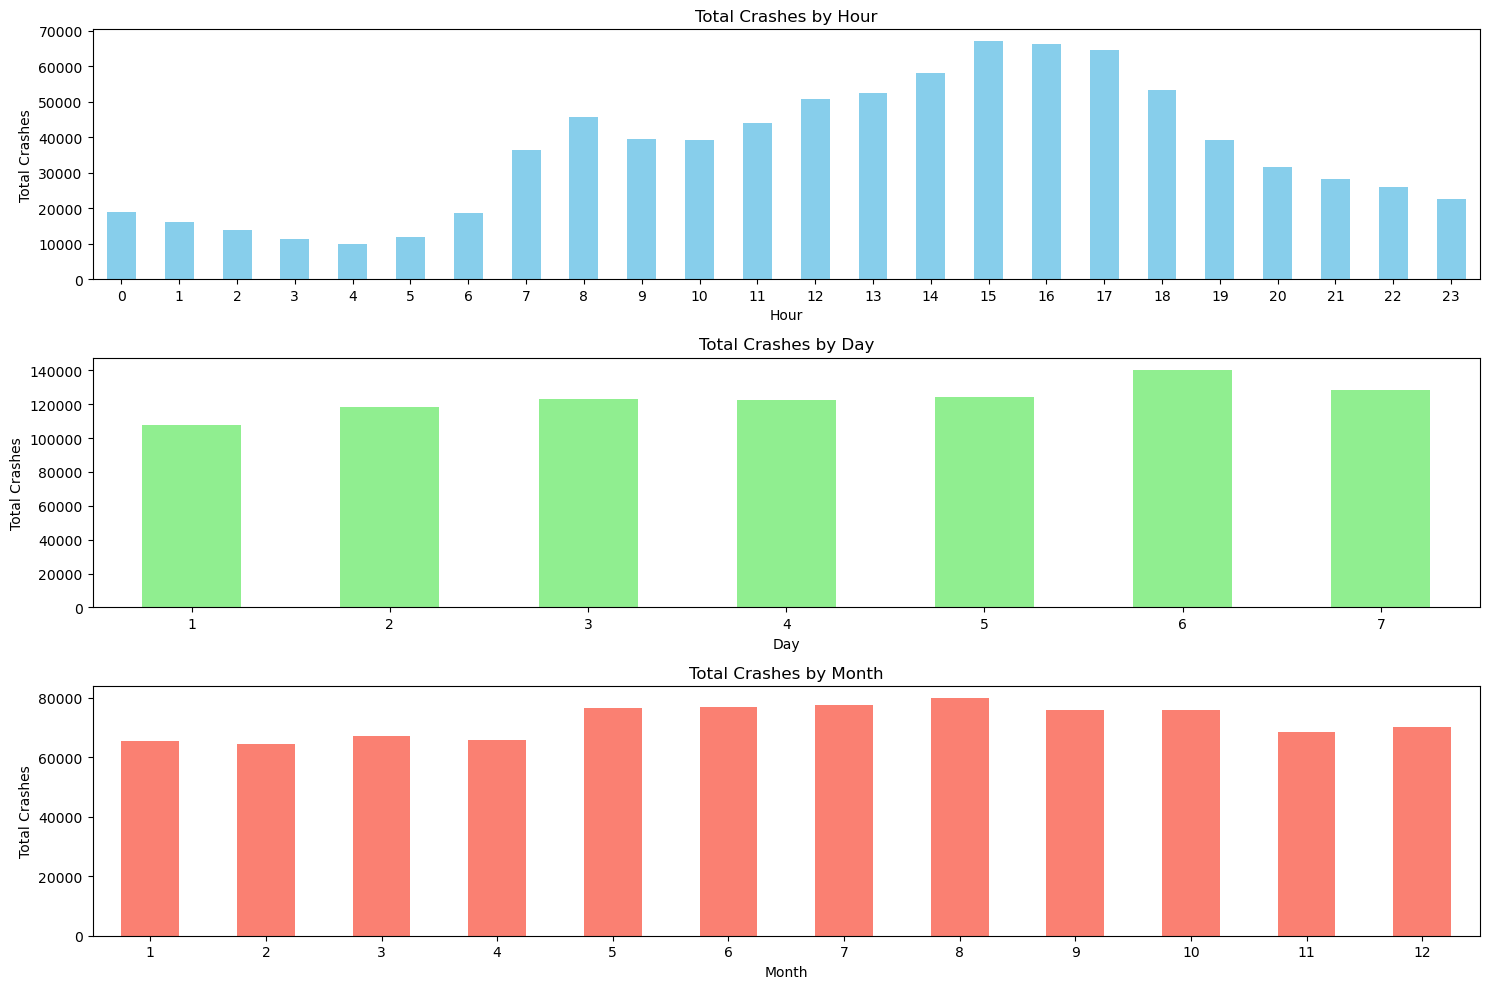

In [39]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))

hourly_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Total Crashes')
axes[0].set_title('Total Crashes by Hour')
axes[0].tick_params(axis='x', rotation=0)

daily_counts.plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Total Crashes')
axes[1].set_title('Total Crashes by Day')
axes[1].tick_params(axis='x', rotation=0)

monthly_counts.plot(kind='bar', color='salmon', ax=axes[2])
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Total Crashes')
axes[2].set_title('Total Crashes by Month')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


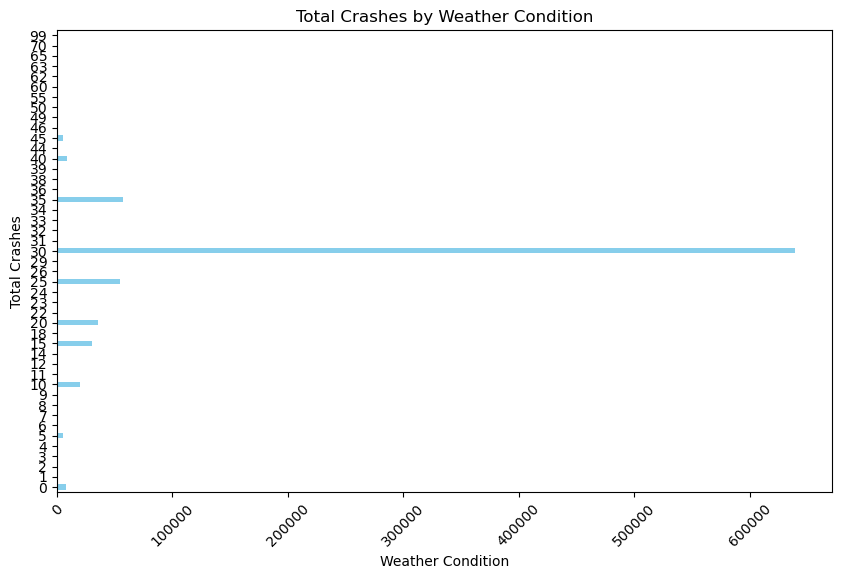

In [40]:
speed_limit_counts = Crashes.groupby(Crashes['POSTED_SPEED_LIMIT']).size()

plt.figure(figsize=(10, 6))
speed_limit_counts.plot(kind='barh', color='skyblue')

plt.xlabel('Weather Condition')
plt.ylabel('Total Crashes')
plt.title('Total Crashes by Weather Condition')
plt.xticks(rotation=45)

plt.show()

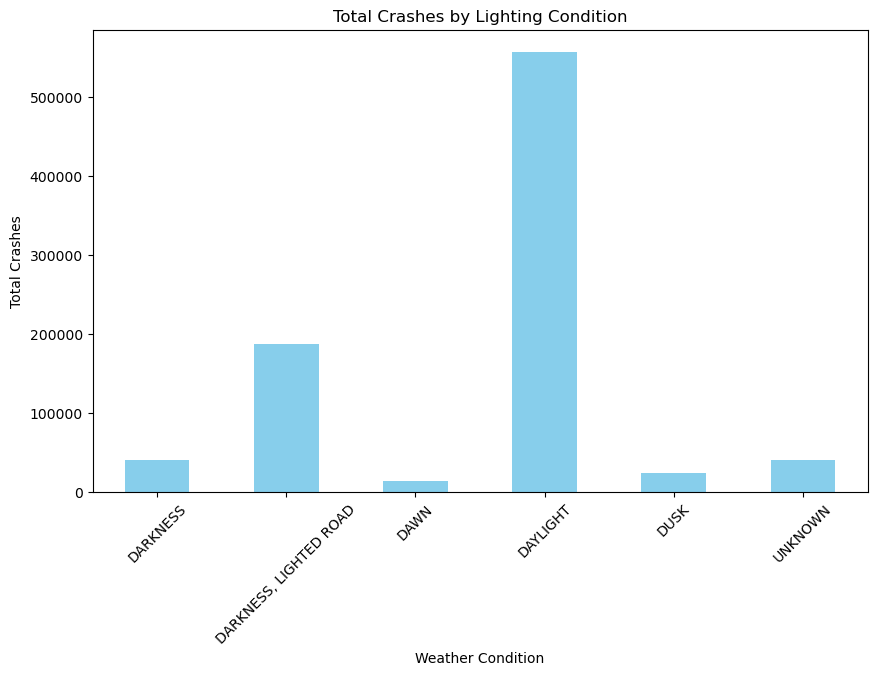

In [41]:
lighting_counts = Crashes.groupby(Crashes['LIGHTING_CONDITION']).size()

plt.figure(figsize=(10, 6))
lighting_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Weather Condition')
plt.ylabel('Total Crashes')
plt.title('Total Crashes by Lighting Condition')
plt.xticks(rotation=45)

plt.show()

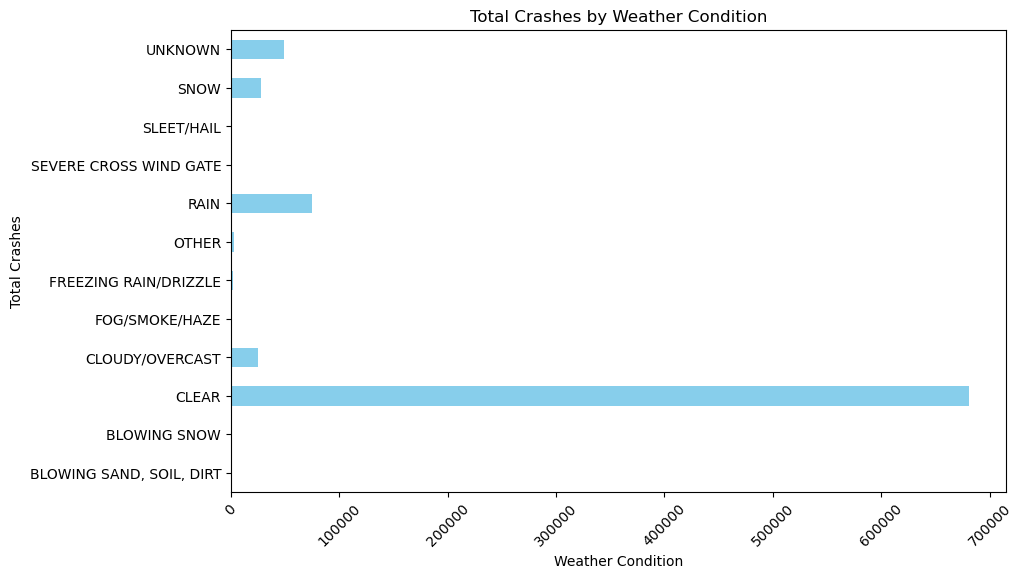

In [42]:
weather_counts = Crashes.groupby(Crashes['WEATHER_CONDITION']).size()

plt.figure(figsize=(10, 6))
weather_counts.plot(kind='barh', color='skyblue')

plt.xlabel('Weather Condition')
plt.ylabel('Total Crashes')
plt.title('Total Crashes by Weather Condition')
plt.xticks(rotation=45)

plt.show()

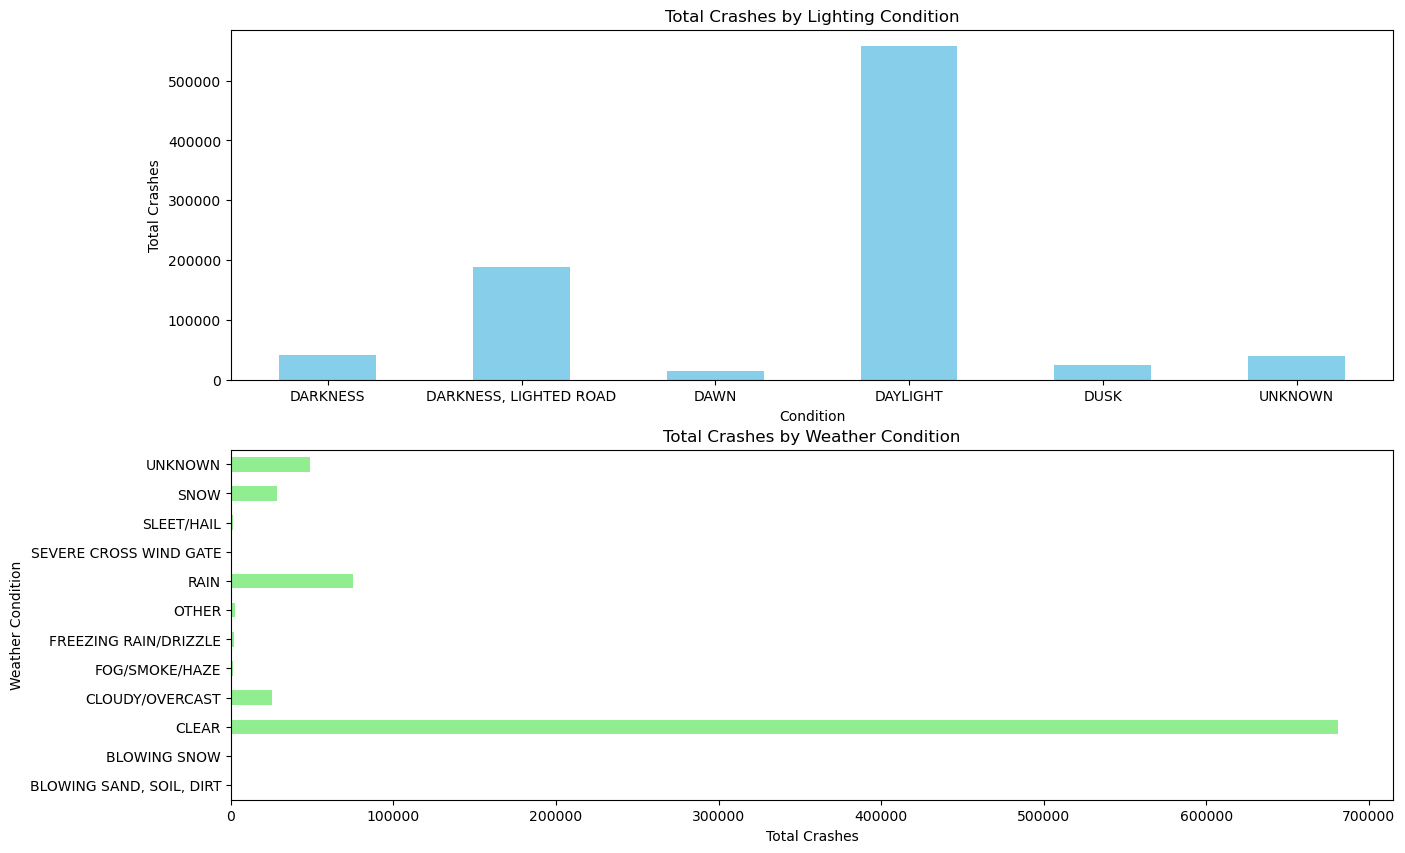

In [43]:
fig, axes = plt.subplots(2,1, figsize=(15, 10))

lighting_counts.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_xlabel('Condition')
axes[0].set_ylabel('Total Crashes')
axes[0].set_title('Total Crashes by Lighting Condition')
axes[0].tick_params(axis='x', rotation=0)

weather_counts.plot(kind='barh', color='lightgreen', ax=axes[1])
axes[1].set_xlabel('Total Crashes')
axes[1].set_ylabel('Weather Condition')
axes[1].set_title('Total Crashes by Weather Condition')
axes[1].tick_params(axis='x', rotation=0)

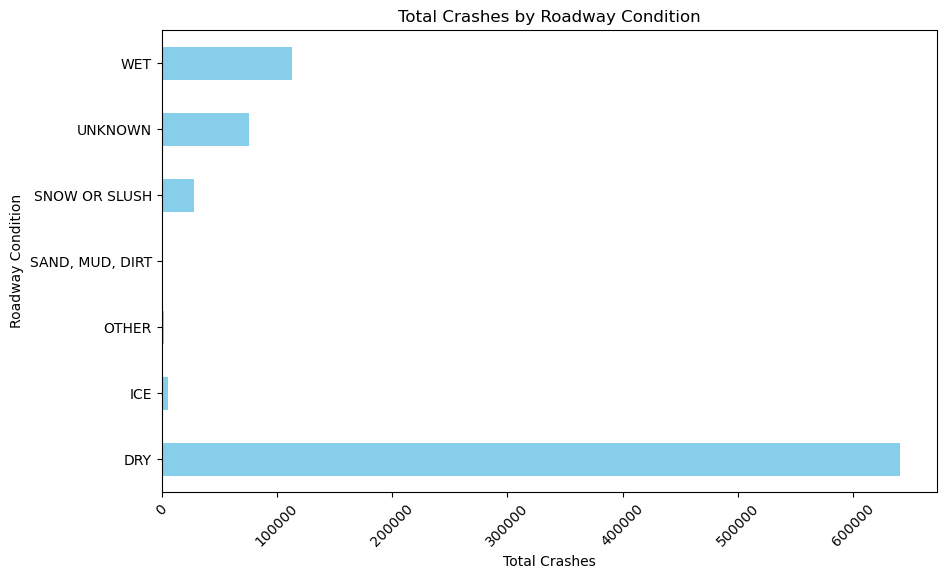

In [44]:
road_condition_counts = Crashes.groupby(Crashes['ROADWAY_SURFACE_COND']).size()

plt.figure(figsize=(10, 6))
road_condition_counts.plot(kind='barh', color='skyblue')

plt.xlabel('Total Crashes')
plt.ylabel('Roadway Condition')
plt.title('Total Crashes by Roadway Condition')
plt.xticks(rotation=45)

plt.show()

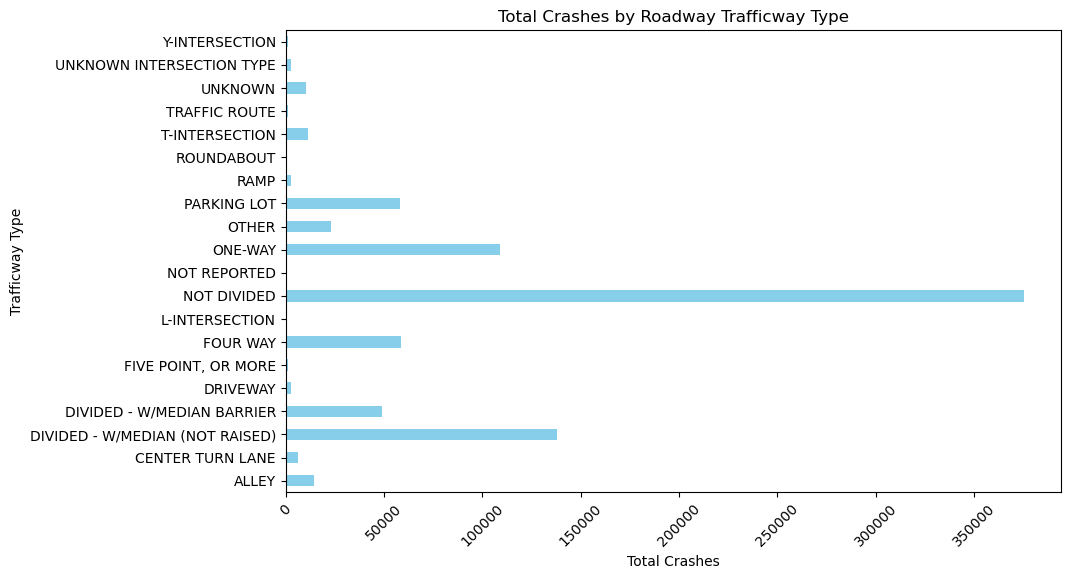

In [45]:
trafficway_counts = Crashes.groupby(Crashes['TRAFFICWAY_TYPE']).size()

plt.figure(figsize=(10, 6))
trafficway_counts.plot(kind='barh', color='skyblue')

plt.xlabel('Total Crashes')
plt.ylabel('Trafficway Type')
plt.title('Total Crashes by Roadway Trafficway Type')
plt.xticks(rotation=45)

plt.show()

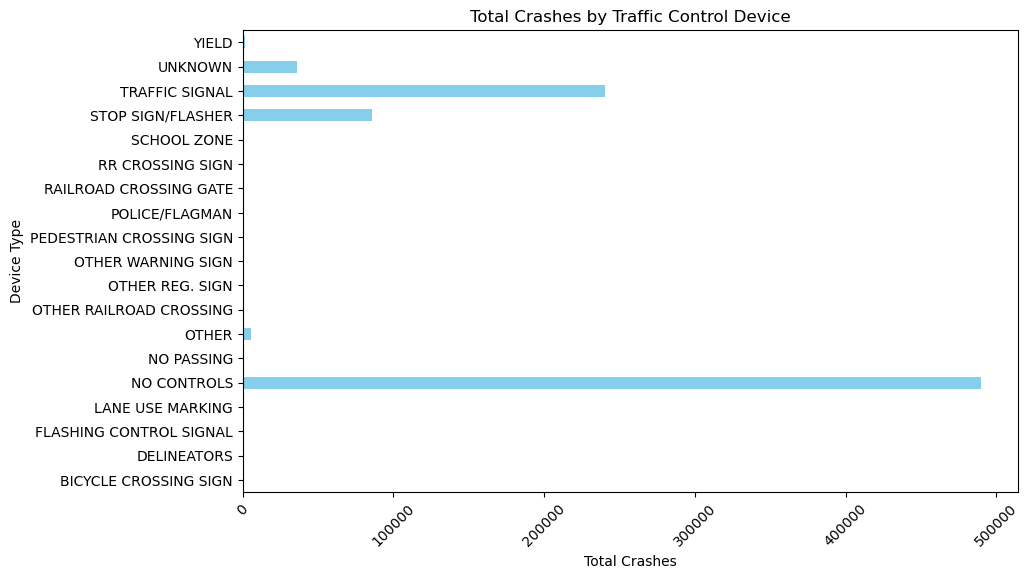

In [46]:
traffic_device = Crashes.groupby(Crashes['TRAFFIC_CONTROL_DEVICE']).size()

plt.figure(figsize=(10, 6))
traffic_device.plot(kind='barh', color='skyblue')

plt.xlabel('Total Crashes')
plt.ylabel('Device Type')
plt.title('Total Crashes by Traffic Control Device')
plt.xticks(rotation=45)

plt.show()

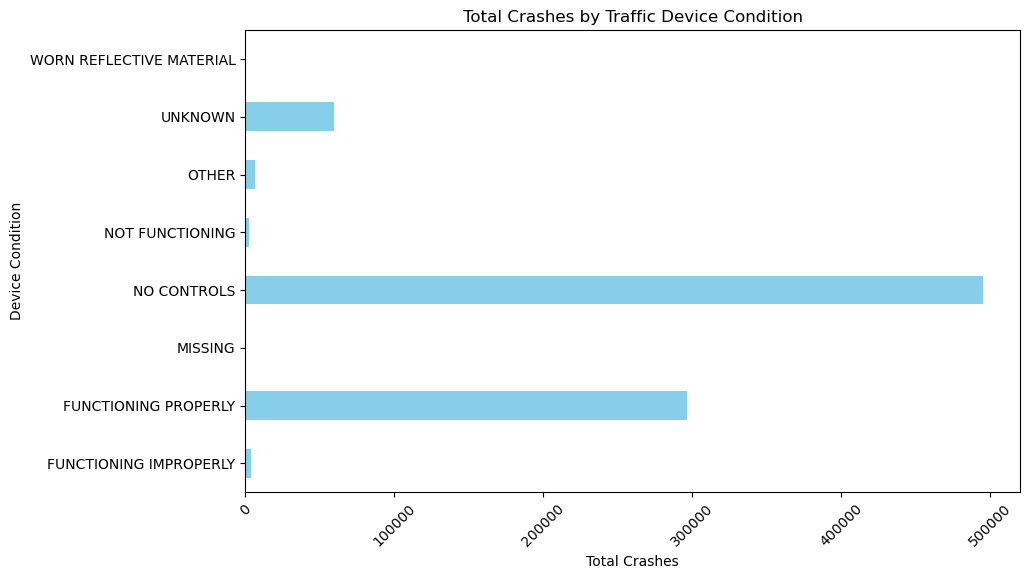

In [47]:
device_condition = Crashes.groupby(Crashes['DEVICE_CONDITION']).size()

plt.figure(figsize=(10, 6))
device_condition.plot(kind='barh', color='skyblue')

plt.xlabel('Total Crashes')
plt.ylabel('Device Condition')
plt.title('Total Crashes by Traffic Device Condition')
plt.xticks(rotation=45)

plt.show()

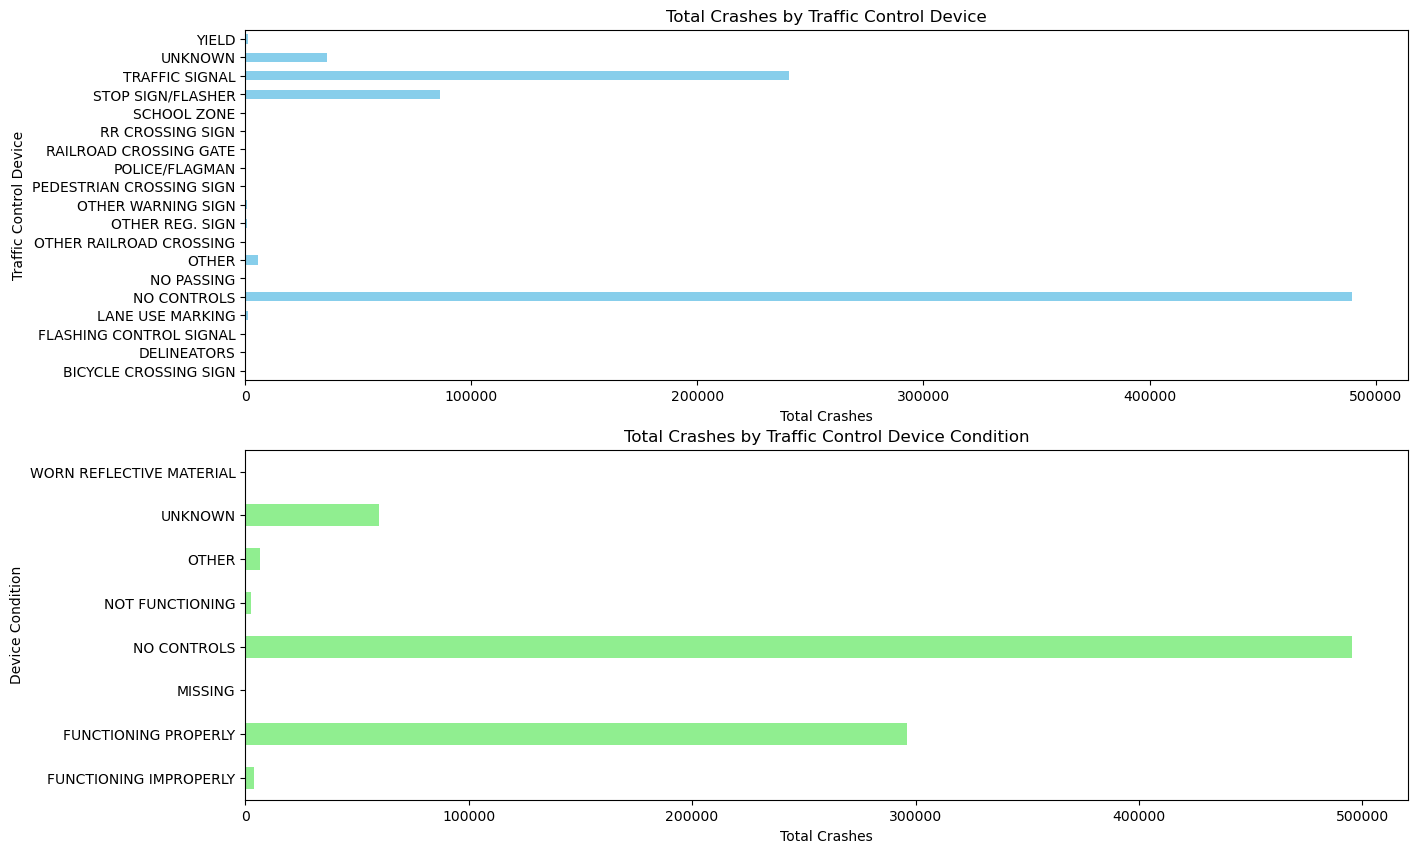

In [48]:
fig, axes = plt.subplots(2,1, figsize=(15, 10))

traffic_device.plot(kind='barh', color='skyblue', ax=axes[0])
axes[0].set_xlabel('Total Crashes')
axes[0].set_ylabel('Traffic Control Device')
axes[0].set_title('Total Crashes by Traffic Control Device')
axes[0].tick_params(axis='x', rotation=0)

device_condition.plot(kind='barh', color='lightgreen', ax=axes[1])
axes[1].set_xlabel('Total Crashes')
axes[1].set_ylabel('Device Condition')
axes[1].set_title('Total Crashes by Traffic Control Device Condition')
axes[1].tick_params(axis='x', rotation=0)

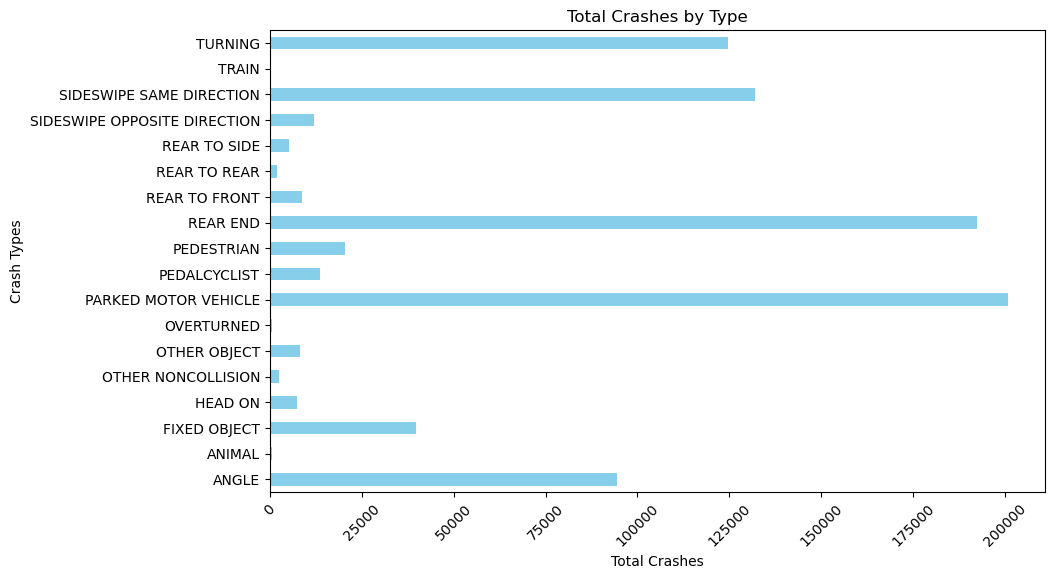

In [49]:
crash_type = Crashes.groupby(Crashes['FIRST_CRASH_TYPE']).size()

plt.figure(figsize=(10, 6))
crash_type.plot(kind='barh', color='skyblue')

plt.xlabel('Total Crashes')
plt.ylabel('Crash Types')
plt.title('Total Crashes by Type')
plt.xticks(rotation=45, fontsize=10)

plt.show()

In [50]:
Crashes = Crashes[Crashes['STREET_DIRECTION'] != 'UNKNOWN']

In [51]:
Crashes['STREET_DIRECTION'].value_counts()

STREET_DIRECTION
W          308582
S          289159
N          208610
E           58795
UNKNOWN         0
Name: count, dtype: int64

STREET_DIRECTION
E     58795
N    208610
S    289159
W    308582
dtype: int64


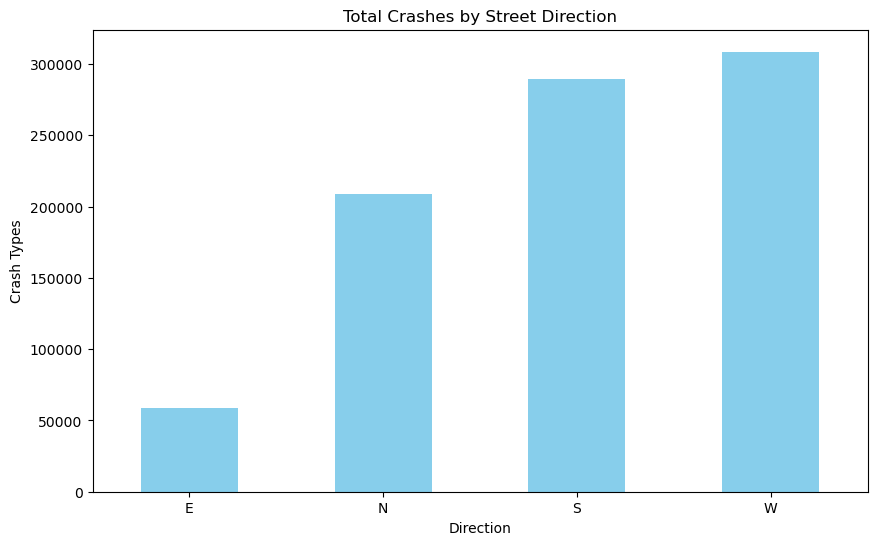

In [59]:

street_direction = Crashes.groupby(Crashes['STREET_DIRECTION']).size()
street_direction = street_direction[street_direction.index != 'UNKNOWN']
print(street_direction)
plt.figure(figsize=(10, 6))
street_direction.plot(kind='bar', color='skyblue')

plt.xlabel('Direction')
plt.ylabel('Crash Types')
plt.title('Total Crashes by Street Direction')
plt.xticks(fontsize=10, rotation=0)

plt.show()

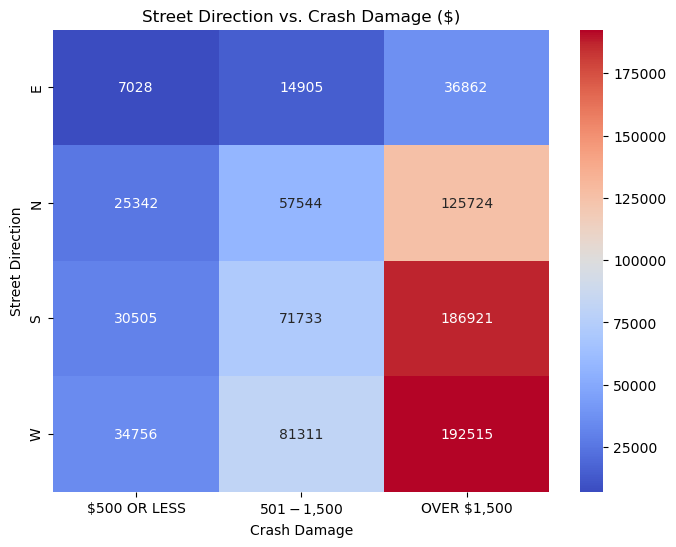

In [72]:
pivot_table = Crashes.pivot_table(index='STREET_DIRECTION', columns='DAMAGE', aggfunc='size', fill_value=0)
pivot_table = pivot_table.loc[(pivot_table.sum(axis=1) > 0)]

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')

plt.xlabel('Crash Damage')
plt.ylabel('Street Direction')
plt.title('Street Direction vs. Crash Damage ($)')

plt.show()

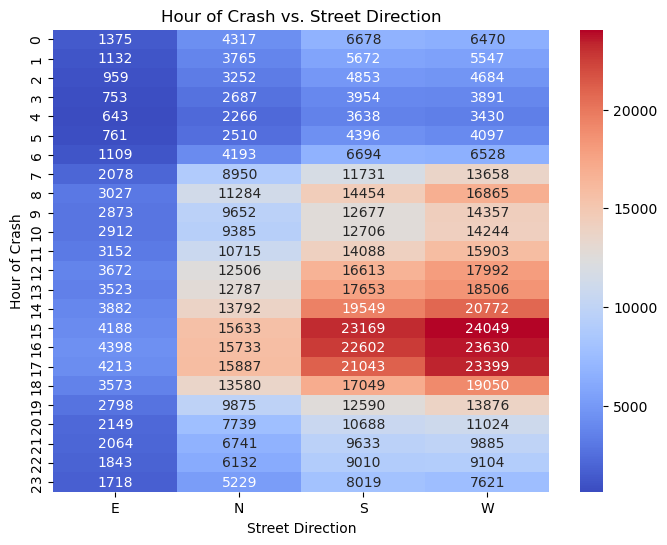

In [114]:
pivot_table = Crashes.pivot_table(index='CRASH_HOUR', columns='STREET_DIRECTION', aggfunc='size', fill_value=0)

pivot_table.columns = pivot_table.columns.astype(str)
pivot_table = pivot_table.drop(columns=['UNKNOWN'], errors='ignore')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')

pivot_table = pivot_table.loc[:, pivot_table.columns[pivot_table.columns != 'UNKNOWN']]

plt.xlabel('Street Direction')
plt.ylabel('Hour of Crash')
plt.title('Hour of Crash vs. Street Direction')

plt.show()

In [96]:
Crashes['TRAFFICWAY_TYPE'].value_counts()

TRAFFICWAY_TYPE
NOT DIVIDED                        375256
DIVIDED - W/MEDIAN (NOT RAISED)    137808
ONE-WAY                            108821
FOUR WAY                            58624
PARKING LOT                         58073
DIVIDED - W/MEDIAN BARRIER          48739
OTHER                               22907
ALLEY                               14312
T-INTERSECTION                      11594
UNKNOWN                             10126
CENTER TURN LANE                     6185
DRIVEWAY                             2793
UNKNOWN INTERSECTION TYPE            2631
RAMP                                 2585
FIVE POINT, OR MORE                  1276
Y-INTERSECTION                       1268
TRAFFIC ROUTE                        1047
NOT REPORTED                          639
ROUNDABOUT                            287
L-INTERSECTION                        175
Name: count, dtype: int64

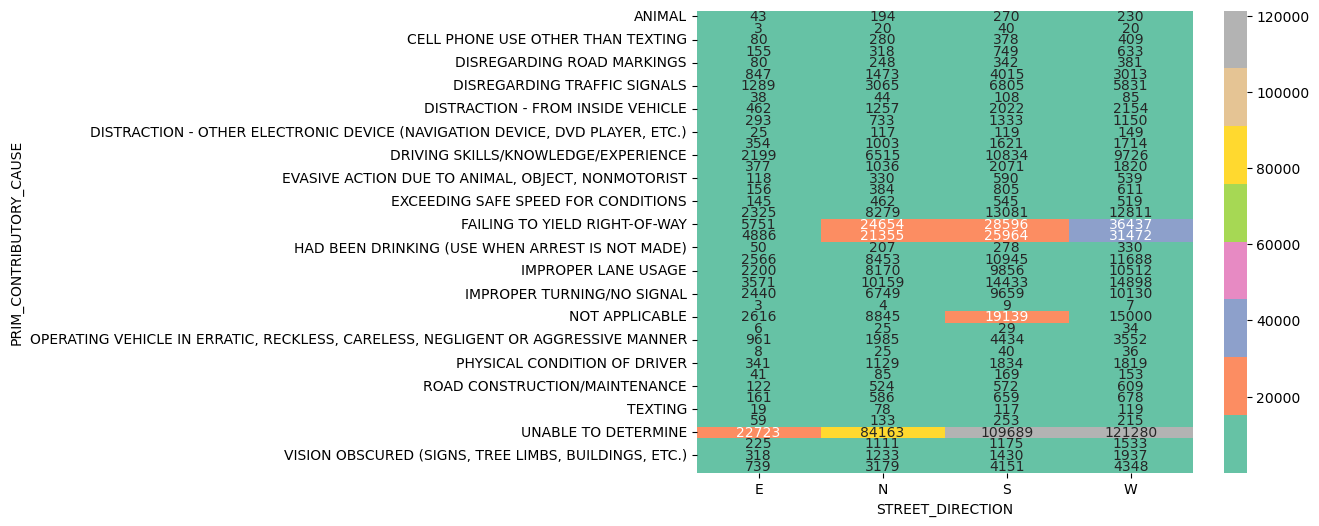

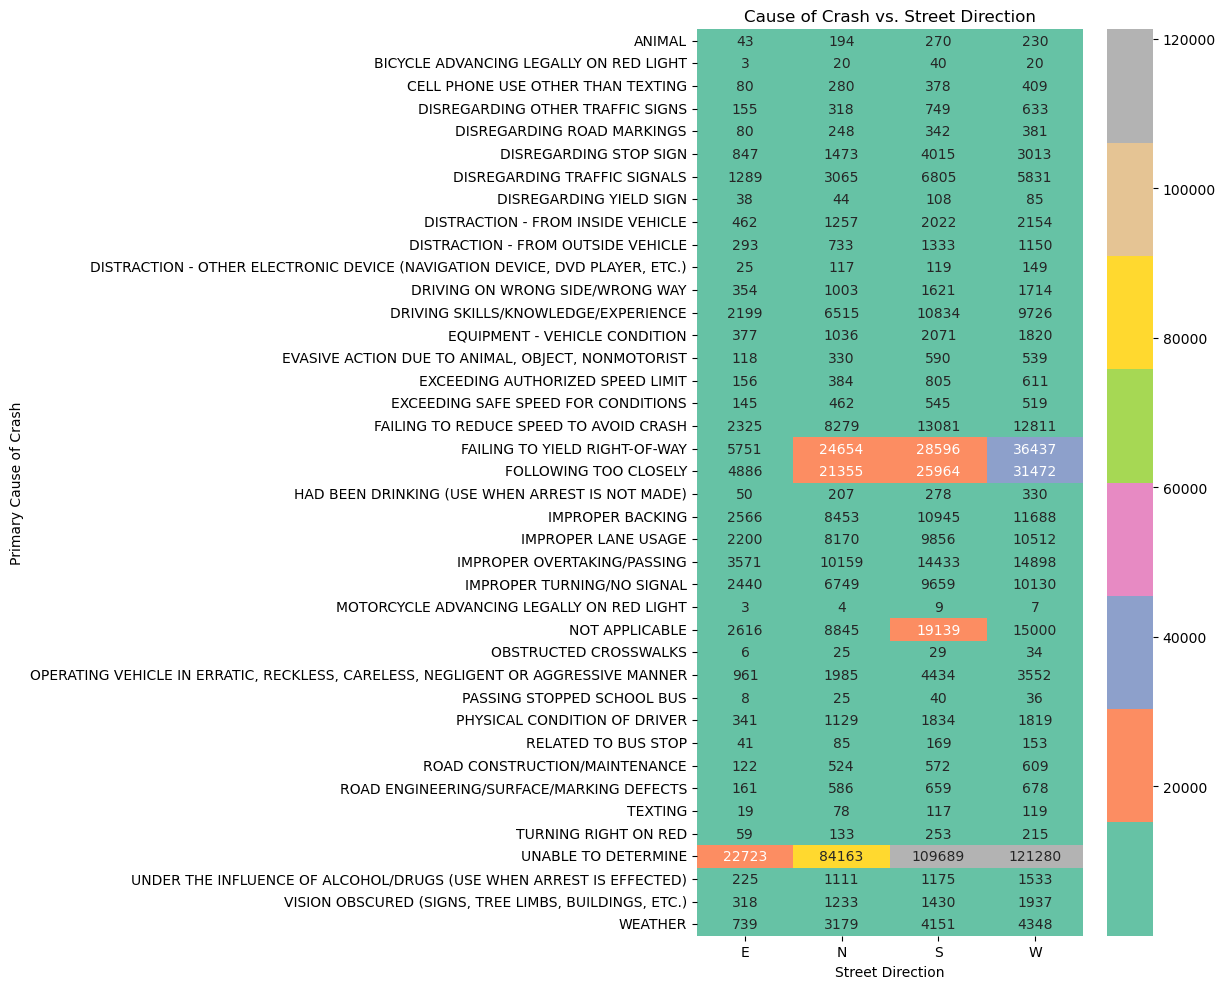

In [143]:
pivot_table = Crashes.pivot_table(index='PRIM_CONTRIBUTORY_CAUSE', columns='STREET_DIRECTION', aggfunc='size', fill_value=0)

pivot_table.columns = pivot_table.columns.astype(str)
pivot_table = pivot_table.drop(columns=['UNKNOWN'], errors='ignore')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='Set2', fmt='d')

pivot_table = pivot_table.loc[:, pivot_table.columns[pivot_table.columns != 'UNKNOWN']]

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pivot_table, annot=True, cmap='Set2', fmt='d', ax=ax)

ax.set_xlabel('Street Direction')
ax.set_ylabel('Primary Cause of Crash')
ax.set_title('Cause of Crash vs. Street Direction')

plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

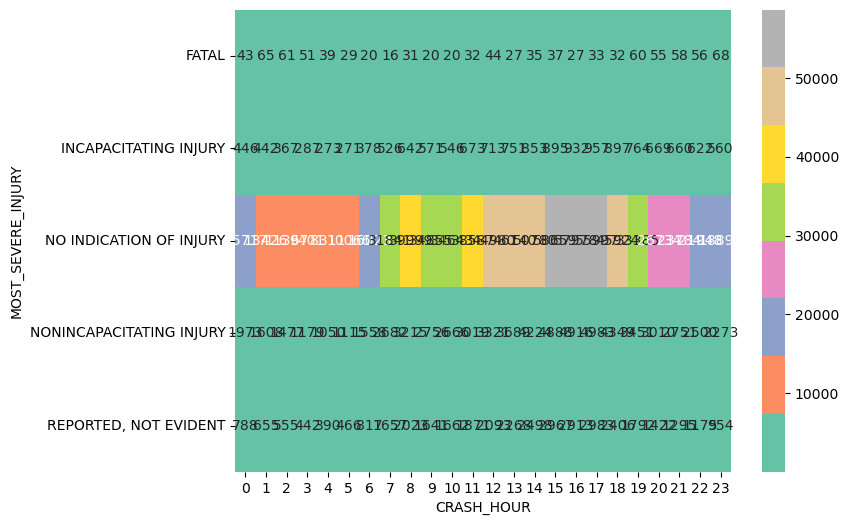

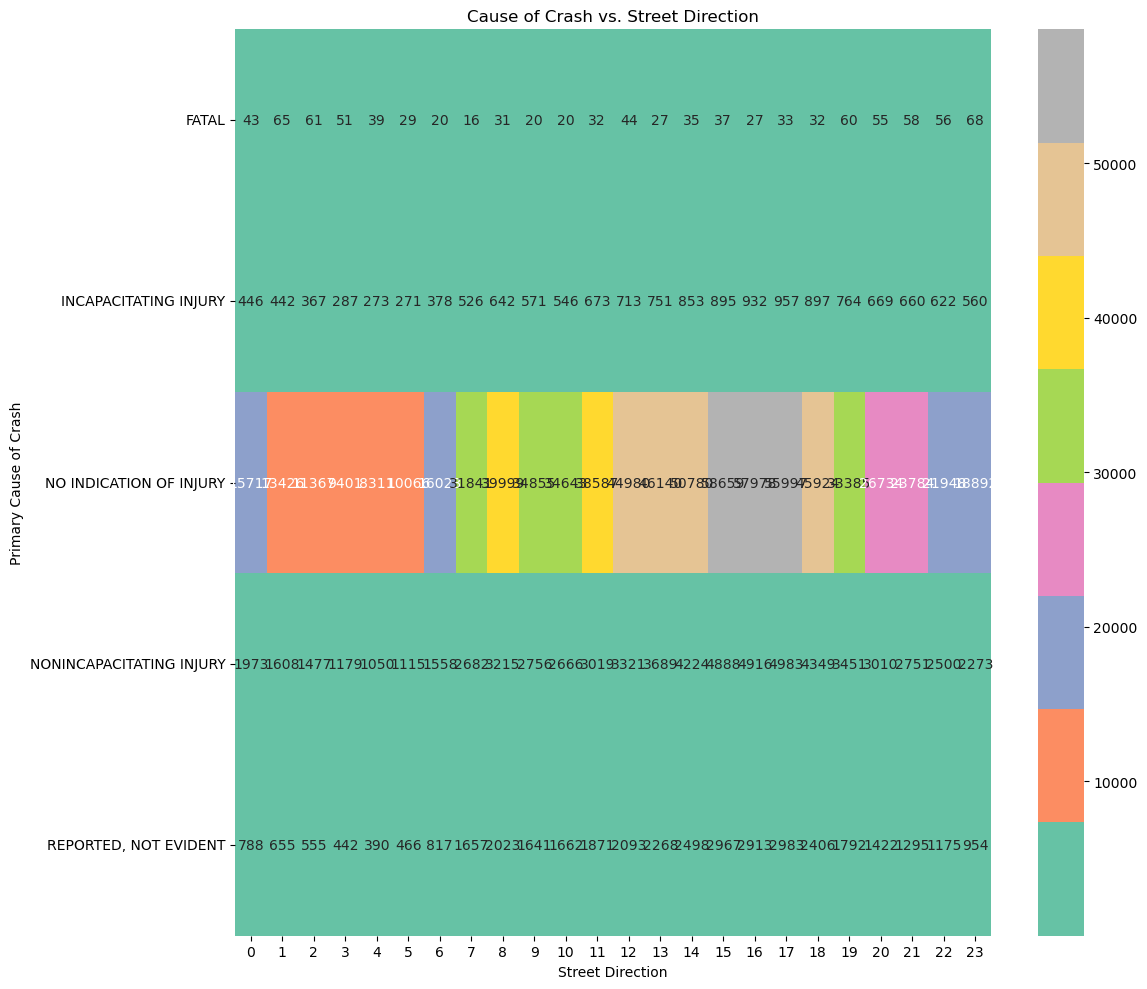

In [ ]:
ctx.add_basemap(ax, crs=gdf.crs.to_string())

ax.set_title('Chicago Boundaries Overlay')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [177]:
fatals.head()

CRASH_RECORD_ID CRASH_DATE_EST_I  \
5    004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...              NaN   
624  004af03c8bc02883b1b9e608969a3e7d5df7de8d145da8...                Y   
826  08265183bea27ea87a05d458ed897d97dc706579223676...              NaN   
925  09eba71804d41a145cbf5423f5a6a99fe8e8e08d4f4757...              NaN   
976  0b5c9ae3e936fd93a9c9dab85e638c0cb848a586a18551...              NaN   

                 CRASH_DATE  POSTED_SPEED_LIMIT TRAFFIC_CONTROL_DEVICE  \
5    11/26/2019 08:38:00 AM                  25            NO CONTROLS   
624  09/16/2019 01:56:00 AM                  30         TRAFFIC SIGNAL   
826  03/16/2022 07:37:00 PM                  35            NO CONTROLS   
925  07/10/2020 02:55:00 AM                  30         TRAFFIC SIGNAL   
976  07/11/2020 06:41:00 AM                  25            NO CONTROLS   

         DEVICE_CONDITION WEATHER_CONDITION      LIGHTING_CONDITION  \
5             NO CONTROLS             CLEAR                DAYLIGHT   
624  FUNCTIONING PROPERLY             CLEAR  DARKNESS, LIGHTED ROAD   
826           NO CONTROLS             CLEAR                DARKNESS   
925               UNKNOWN           UNKNOWN  DARKNESS, LIGHTED ROAD   
976           NO CONTROLS             CLEAR                DAYLIGHT   

    FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  ...  \
5         PEDESTRIAN                          ONE-WAY  ...   
624       PEDESTRIAN                          ONE-WAY  ...   
826       PEDESTRIAN  DIVIDED - W/MEDIAN (NOT RAISED)  ...   
925       PEDESTRIAN                         FOUR WAY  ...   
976          HEAD ON                      NOT DIVIDED  ...   

     INJURIES_NON_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT  \
5                            0.0                           0.0   
624                          0.0                           0.0   
826                          0.0                           0.0   
925                          0.0                           0.0   
976                          2.0                           0.0   

    INJURIES_NO_INDICATION INJURIES_UNKNOWN CRASH_HOUR CRASH_DAY_OF_WEEK  \
5                      1.0              0.0          8                 3   
624                    1.0              0.0          1                 2   
826                    1.0              0.0         19                 4   
925                    1.0              0.0          2                 6   
976                    0.0              0.0          6                 7   

    CRASH_MONTH   LATITUDE  LONGITUDE  \
5            11        NaN        NaN   
624           9  41.892374 -87.627243   
826           3  41.694578 -87.681392   
925           7        NaN        NaN   
976           7  41.990581 -87.694474   

                                     LOCATION  
5                                         NaN  
624  POINT (-87.627242941998 41.892374041012)  
826  POINT (-87.681392214993 41.694577925956)  
925                                       NaN  
976  POINT (-87.694474132951 41.990580936971)  

[5 rows x 48 columns]

In [191]:
!pip install osmnx

  Obtaining dependency information for osmnx from https://files.pythonhosted.org/packages/71/59/92e878a9f22cd820d10e361685ca064facee93ebc50c7afc4e0a5cfe7759/osmnx-1.9.4-py3-none-any.whl.metadata
  Obtaining dependency information for geopandas<0.15,>=0.12 from https://files.pythonhosted.org/packages/3e/b0/69fa7a0f55122847506a42fea6988d03b34136938082f142151bc9d9f7e7/geopandas-0.14.4-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/95/32/c1d53b4d77926414ffdf5bd38344e900e378ae9ccb2a65754cdb6d5344c2/fiona-1.10.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
     ------- -------------------------------- 10.2/58.1 kB ? eta -:--:--
     -------------------- ----------------- 30.7/58.1 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 58.1/58.1 kB 613.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/107.5 kB ? eta -:--:--


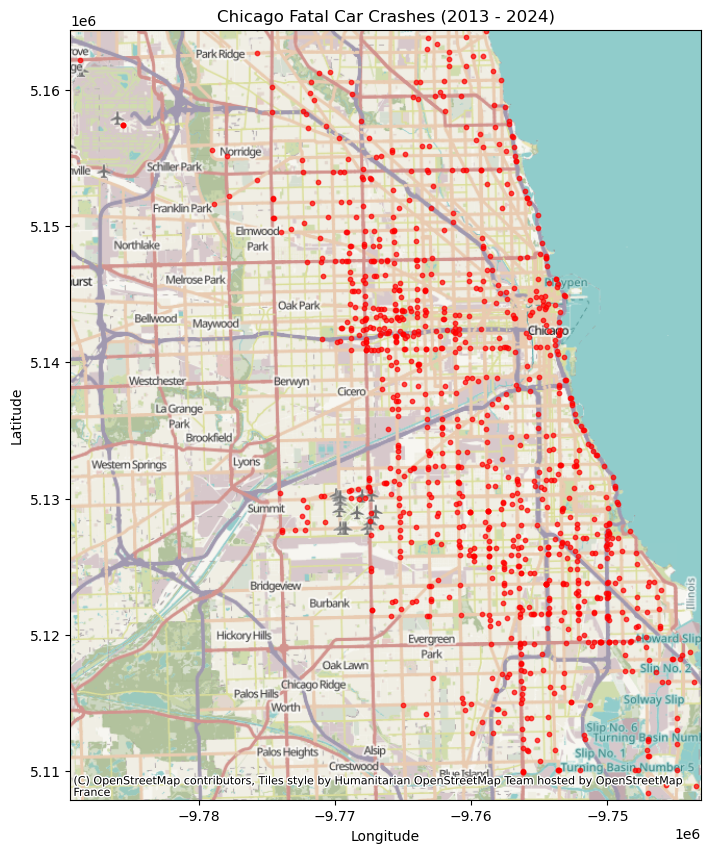

In [165]:
fatals = Crashes[Crashes['MOST_SEVERE_INJURY'] == 'FATAL']

shapefile = gpd.read_file('./beat_boundaries.shp')

geometry = [Point(xy) for xy in zip(fatals['LONGITUDE'], fatals['LATITUDE'])]
gdf_points = gpd.GeoDataFrame(fatals, geometry=geometry, crs='EPSG:4326')

shapefile = shapefile.to_crs(epsg=3857)
gdf_points = gdf_points.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))

shapefile.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0)

ctx.add_basemap(ax, crs=shapefile.crs.to_string())

gdf_points.plot(ax=ax, marker='o', color='red', markersize=10, alpha=0.7)

ax.set_xlim(shapefile.total_bounds[[0, 2]])
ax.set_ylim(shapefile.total_bounds[[1, 3]])

plt.title('Chicago Fatal Car Crashes (2013 - 2024)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\default.DESKTOP-SQ5PJUF\AppData\Local\Temp\ipykernel_4888\10531324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatals['CRASH_DATE'] = pd.to_datetime(fatals['CRASH_DATE'])


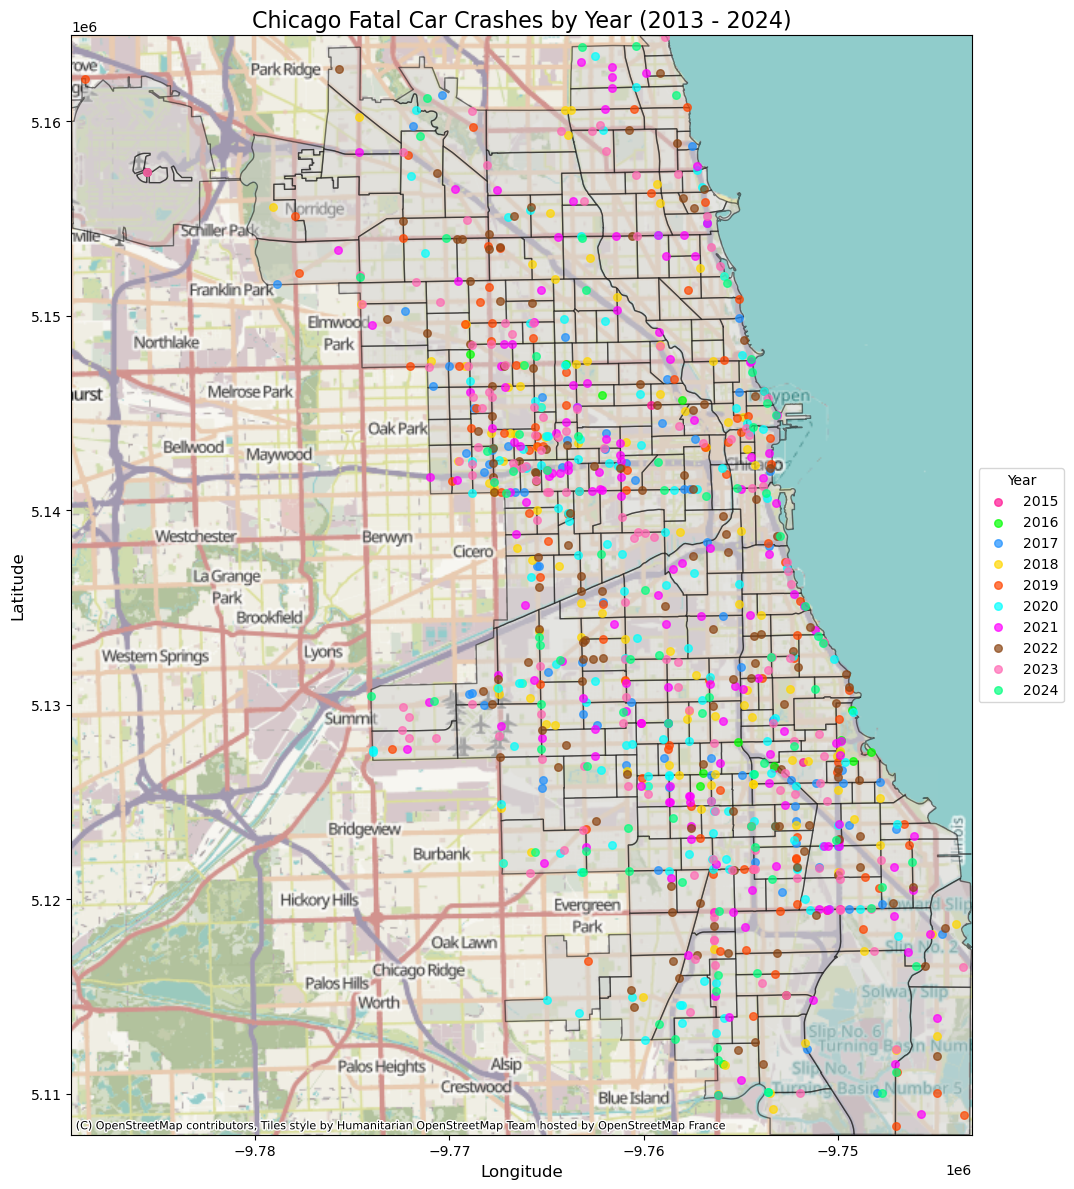

In [183]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
import pandas as pd
import numpy as np

fatals = Crashes[Crashes['MOST_SEVERE_INJURY'] == 'FATAL']

fatals['CRASH_DATE'] = pd.to_datetime(fatals['CRASH_DATE'])

shapefile = gpd.read_file('./beat_boundaries.shp')
geometry = [Point(xy) for xy in zip(fatals['LONGITUDE'], fatals['LATITUDE'])]
gdf_points = gpd.GeoDataFrame(fatals, geometry=geometry, crs='EPSG:4326')

shapefile = shapefile.to_crs(epsg=3857)
gdf_points = gdf_points.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(12, 12))
shapefile.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)
ctx.add_basemap(ax, crs=shapefile.crs.to_string())

years = sorted(gdf_points['CRASH_DATE'].dt.year.unique())

colors = ['#FF1493', '#00FF00', '#1E90FF', '#FFD700', '#FF4500', 
          '#00FFFF', '#FF00FF', '#8B4513', '#FF69B4', '#00FF7F']

colors = colors * (len(years) // len(colors) + 1)

for year, color in zip(years, colors):
    year_data = gdf_points[gdf_points['CRASH_DATE'].dt.year == year]
    year_data.plot(ax=ax, marker='o', color=color, markersize=30, alpha=0.7, label=str(year))

ax.set_xlim(shapefile.total_bounds[[0, 2]])
ax.set_ylim(shapefile.total_bounds[[1, 3]])
plt.title('Chicago Fatal Car Crashes by Year (2013 - 2024)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

plt.legend(title='Year', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

plt.tight_layout()
plt.show()

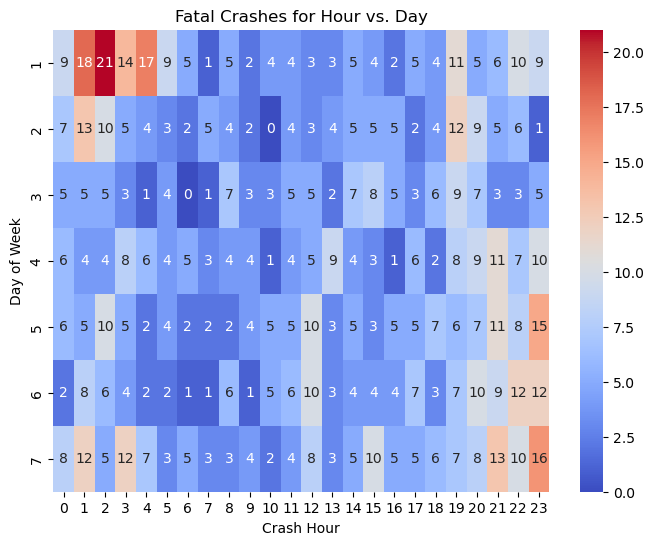

In [176]:
pivot_table = fatals.pivot_table(index='CRASH_DAY_OF_WEEK', columns='CRASH_HOUR', aggfunc='size', fill_value=0)

pivot_table.columns = pivot_table.columns.astype(str)
pivot_table = pivot_table.drop(columns=['UNKNOWN'], errors='ignore')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')

pivot_table = pivot_table.loc[:, pivot_table.columns[pivot_table.columns != 'UNKNOWN']]

plt.xlabel('Crash Hour')
plt.ylabel('Day of Week')
plt.title('Fatal Crashes for Hour vs. Day')

plt.show()

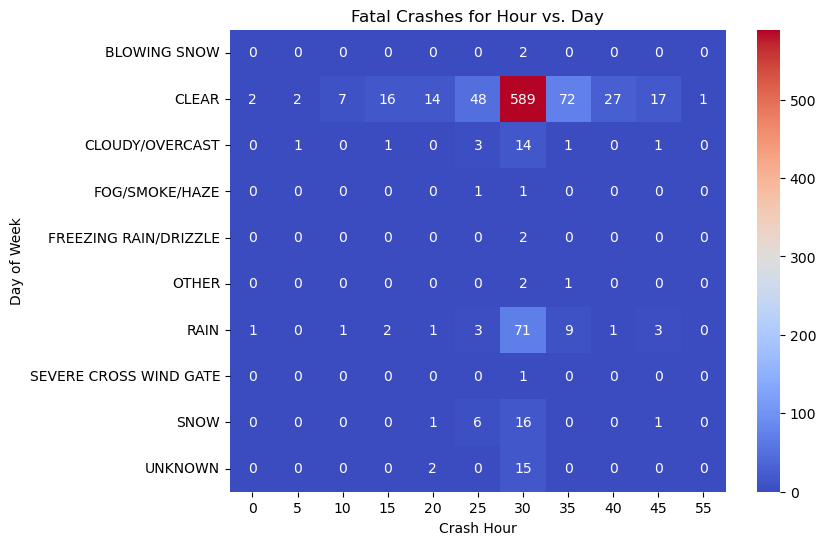

In [190]:
pivot_table = fatals.pivot_table(index='WEATHER_CONDITION', columns='POSTED_SPEED_LIMIT', aggfunc='size', fill_value=0)

pivot_table.columns = pivot_table.columns.astype(str)
pivot_table = pivot_table.drop(columns=['UNKNOWN'], errors='ignore')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')

pivot_table = pivot_table.loc[:, pivot_table.columns[pivot_table.columns != 'UNKNOWN']]

plt.xlabel('Crash Hour')
plt.ylabel('Day of Week')
plt.title('Fatal Crashes for Hour vs. Day')

plt.show()

C:\Users\default.DESKTOP-SQ5PJUF\AppData\Local\Temp\ipykernel_4888\1274309214.py:55: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


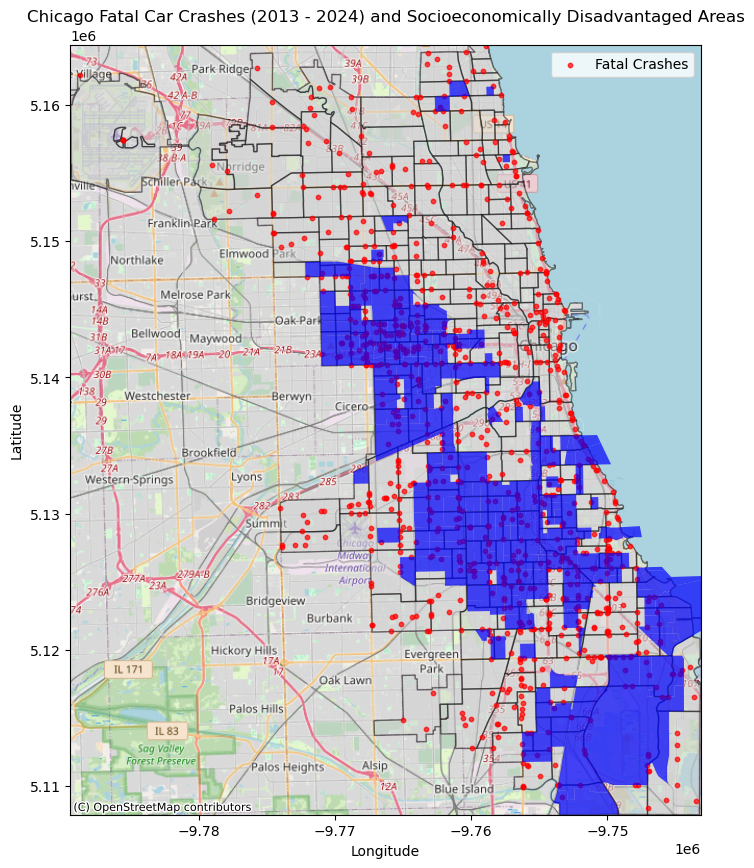

In [306]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
from shapely.geometry import Point
from shapely.wkt import loads

shapefile = gpd.read_file('./beat_boundaries.shp')

csv_file = 'socioeconomic.csv'
fatals = Crashes[Crashes['MOST_SEVERE_INJURY'] == 'FATAL']

geometry = [Point(xy) for xy in zip(fatals['LONGITUDE'], fatals['LATITUDE'])]
gdf_fatal_points = gpd.GeoDataFrame(fatals, geometry=geometry, crs='EPSG:4326')

points_csv = 'socioeconomic.csv'
points_df = pd.read_csv(points_csv)
points_df['geometry'] = points_df['the_geom'].apply(loads)
gdf_additional_points = gpd.GeoDataFrame(points_df, geometry='geometry', crs='EPSG:4326')

shapefile = shapefile.to_crs(epsg=3857)
gdf_fatal_points = gdf_fatal_points.to_crs(epsg=3857)
gdf_additional_points = gdf_additional_points.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))

shapefile.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)

ctx.add_basemap(ax, crs=shapefile.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

gdf_fatal_points.plot(ax=ax, marker='o', color='red', markersize=10, alpha=0.7, label='Fatal Crashes')

gdf_additional_points.plot(ax=ax, marker='o', color='blue', markersize=10, alpha=0.7, label='Additional Points')

ax.set_xlim(shapefile.total_bounds[[0, 2]])
ax.set_ylim(shapefile.total_bounds[[1, 3]])

plt.title('Chicago Fatal Car Crashes (2013 - 2024) and Socioeconomically Disadvantaged Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend()

plt.show()

In [193]:
!pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/ae/6d/18a7546e1748ecdd6ed7cd00d3f183faf1df08bd4f5e5e0eb3e72458b862/folium-0.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ------- ------------------------------- 20.5/108.4 kB 682.7 kB/s eta 0:00:01
   ---------------------------------- ----- 92.2/108.4 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 108.4/108.4 kB 1.3 MB/s eta 0:00:00


In [300]:
shapefile = gpd.read_file('./zips.shp')
population = gpd.read_file('./Chicago_Population_Counts_20240922.csv')

if not shapefile.crs.is_projected:
    shapefile = shapefile.to_crs(epsg=3857)

shapefile['area'] = shapefile.geometry.area

shapefile['area_km2'] = shapefile['area'] / 1e6

shapefile = shapefile.merge(population, on='zip', how='inner')

shapefile['total_population'] = shapefile['total_population'].astype('int')

shapefile['population_density'] = shapefile['total_population'] / shapefile['area_km2']

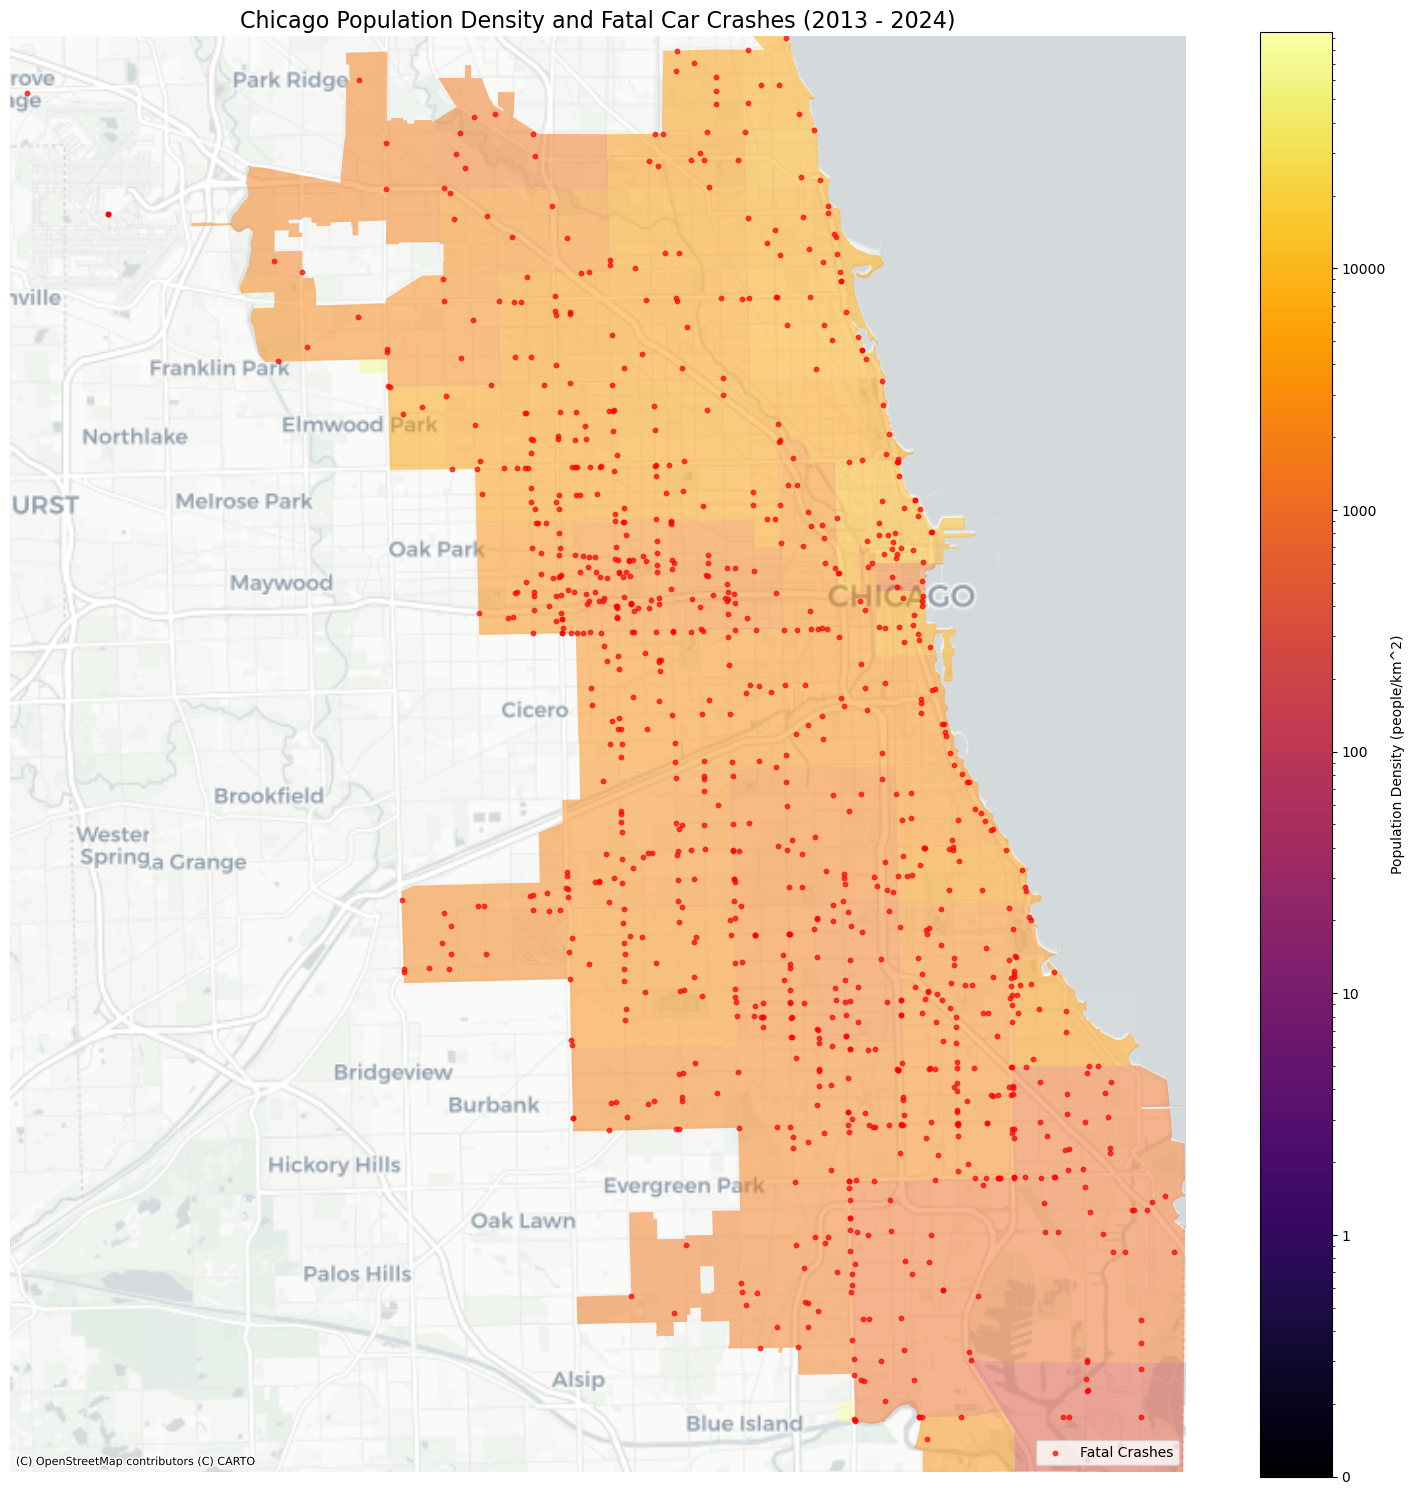

In [301]:
geometry = [Point(xy) for xy in zip(fatals['LONGITUDE'], fatals['LATITUDE'])]
gdf_points = gpd.GeoDataFrame(fatals, geometry=geometry, crs='EPSG:4326')

shapefile = shapefile.to_crs(epsg=3857)
gdf_points = gdf_points.to_crs(epsg=3857)

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

vmin = shapefile['population_density'].min()
vmax = shapefile['population_density'].max()
norm = LogNorm(vmin=max(vmin, 0.1), vmax=vmax)

shapefile.plot(column='population_density', ax=ax, legend=True, alpha=0.5, 
               cmap='inferno', norm=norm,
               legend_kwds={'label': 'Population Density (people/km^2)', 'format': '%.0f'})

ctx.add_basemap(ax, crs=shapefile.crs.to_string(), source=ctx.providers.CartoDB.Positron)

gdf_points.plot(ax=ax, marker='o', color='red', markersize=10, alpha=0.7, label='Fatal Crashes')

ax.set_title('Chicago Population Density and Fatal Car Crashes (2013 - 2024)', fontsize=16)
ax.axis('off')

ax.legend(loc='lower right')

ax.set_xlim(shapefile.total_bounds[[0, 2]])
ax.set_ylim(shapefile.total_bounds[[1, 3]])

plt.tight_layout()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [287]:
liquor = gpd.read_file('./liquor.shp')

liquor.columns

Index(['VOTE_DRY_I', 'STATUS', 'geometry'], dtype='object')

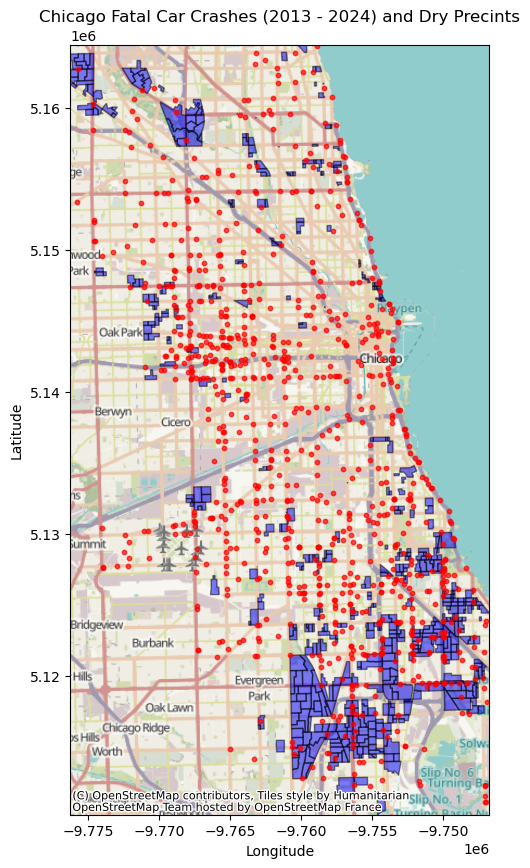

In [302]:
fatals = Crashes[Crashes['MOST_SEVERE_INJURY'] == 'FATAL']

shapefile = gpd.read_file('./liquor.shp')

geometry = [Point(xy) for xy in zip(fatals['LONGITUDE'], fatals['LATITUDE'])]
gdf_points = gpd.GeoDataFrame(fatals, geometry=geometry, crs='EPSG:4326')

shapefile = shapefile.to_crs(epsg=3857)
gdf_points = gdf_points.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))

shapefile.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5)

ctx.add_basemap(ax, crs=shapefile.crs.to_string())

gdf_points.plot(ax=ax, marker='o', color='red', markersize=10, alpha=0.7)

ax.set_xlim(shapefile.total_bounds[[0, 2]])
ax.set_ylim(shapefile.total_bounds[[1, 3]])

plt.title('Chicago Fatal Car Crashes (2013 - 2024) and Dry Precints')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [307]:
len(fatals)

959

STREET_DIRECTION
E     74
N    144
S    434
W    307
dtype: int64


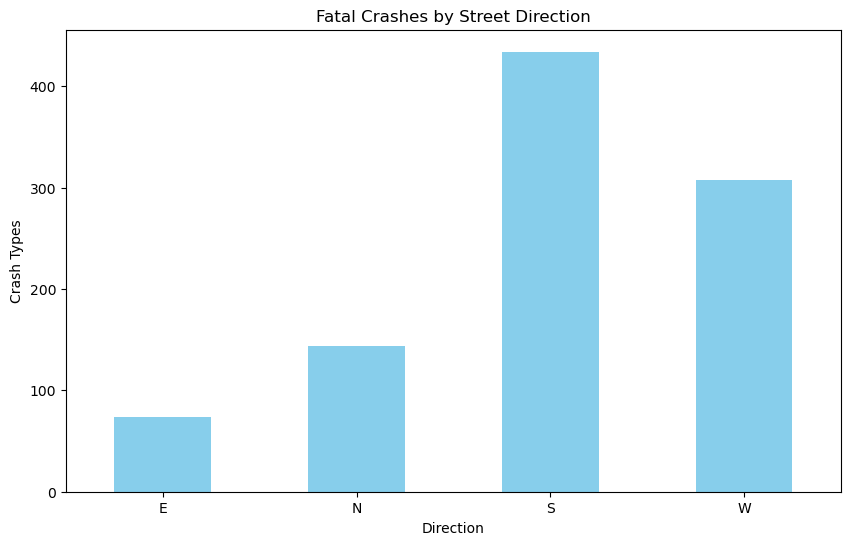

In [309]:
street_direction = fatals.groupby(fatals['STREET_DIRECTION']).size()
street_direction = street_direction[street_direction.index != 'UNKNOWN']
print(street_direction)
plt.figure(figsize=(10, 6))
street_direction.plot(kind='bar', color='skyblue')

plt.xlabel('Direction')
plt.ylabel('Crash Types')
plt.title('Fatal Crashes by Street Direction')
plt.xticks(fontsize=10, rotation=0)

plt.show()